In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from scipy.special import softmax
from scipy.stats import zscore

### 1. Create Data

In [155]:
import numpy as np

## PLOTTING ##

import matplotlib.pyplot as plt
import numpy as np

def plot_propensities(X, T, xx0_grid, xx1_grid, propensities_grid, points_per_axis, policy_name="1"):
    # Calculate the min and max values for the color scale
    vmin = min(propensities_grid[:, 0].min(), propensities_grid[:, 1].min())
    vmax = max(propensities_grid[:, 0].max(), propensities_grid[:, 1].max())

    # Create subplots
    fig, axs = plt.subplots(1, 2, figsize=(10, 5), sharex=True, sharey=False, dpi=400)

    # Plot the first propensity
    contour0 = axs[0].contourf(xx0_grid, xx1_grid, propensities_grid[:, 0].reshape(points_per_axis, points_per_axis), alpha=0.4, levels=20, vmin=vmin, vmax=vmax, cmap='Spectral')
    axs[0].scatter(X[:,0], X[:,1], c=T, s=3, cmap='Spectral')
    axs[0].set_title('A0 Distribution')
    #axs[0].set_aspect('equal')

    # Plot the second propensity
    contour1 = axs[1].contourf(xx0_grid, xx1_grid, propensities_grid[:, 1].reshape(points_per_axis, points_per_axis), alpha=0.4, levels=20, vmin=vmin, vmax=vmax, cmap='Spectral')
    # plt.scatter(X, c=T, alpha=0.5)
    #axs[1].scatter(X[:,0], X[:,1], c=T, s=2, cmap='Spectral')

    colors = plt.cm.Spectral(np.linspace(0, 1, len(np.unique(T))))
    for t in np.unique(T):
        axs[1].scatter(X[:,0][T == t], X[:,1][T == t], color=colors[t], s=3, label=f'$A^\\pi$={t}')
        #axs[0].hist(Y_diff[T == t], bins=30, color=colors[t], alpha=0.7, label=f'$A^\\pi$={t}')

    if policy_name == "1":
        title = r'Assignment Policy: $\pi_1^{\beta=2}$'
    elif policy_name == "2":
        title = r'Assignment Policy: $\pi_2^{\beta=2}$'
    elif policy_name == "3":
        title = r'Assignment Policy: $\pi_3^{\beta=2}$'
    elif policy_name == "4":
        title = r'Assignment Policy: $\pi_4^{\beta=2}$'
    elif policy_name == "RCT":
        title = r'Assignment Policy: $\pi_{RCT}^{\beta=2}$'
        
    axs[1].set_title(f'{title}')
    #axs[1].set_aspect('equal')
    axs[1].legend(loc='upper right', fontsize=9)
    axs[1].set_xlabel(r'$X_0$')
    axs[1].set_ylabel(r'$X_1$')

    # Add a single shared colorbar
    #cbar = fig.colorbar(contour1, ax=axs, orientation='vertical', fraction=0.02, pad=0.04)
    #plt.tight_layout()
    # save figure
    plt.savefig(f"A_{policy_name}.png")
    
def plot_outcomes(xx0_grid, xx1_grid, X0, X1, Y_grid, T, points_per_axis, policy_name):
    # Calculate the min and max values for the color scale
    vmin = min(Y_grid[:, 0].min(), Y_grid[:, 1].min(), (Y_grid[:, 1] - Y_grid[:, 0]).min())
    vmax = max(Y_grid[:, 0].max(), Y_grid[:, 1].max(), (Y_grid[:, 1] - Y_grid[:, 0]).max())

    # Plot the above three plots in a single figure next to each other, all with the same colorbar
    fig, axs = plt.subplots(1, 3, figsize=(15, 5), sharex=True, sharey=False, dpi=400)
    contour0 = axs[0].contourf(xx0_grid, xx1_grid, Y_grid[:, 0].reshape(points_per_axis, points_per_axis), alpha=0.5, levels=20, vmin=vmin, vmax=vmax)
    
    
    axs[0].scatter(X0, X1, c=T, s=3, cmap='Spectral')
    axs[0].set_title('Y0')
    axs[0].set_aspect('equal')
    axs[0].set_xlabel(r'$X_0$')
    axs[0].set_ylabel(r'$X_1$')
    #axs[0].legend(loc='upper right', fontsize=6)

    contour1 = axs[1].contourf(xx0_grid, xx1_grid, Y_grid[:, 1].reshape(points_per_axis, points_per_axis), alpha=0.5, levels=20, vmin=vmin, vmax=vmax)
    axs[1].scatter(X0, X1, c=T, s=3, cmap='Spectral')
    axs[1].set_title('Y1')
    axs[1].set_aspect('equal')
    axs[1].set_xlabel(r'$X_0$')
    axs[1].set_ylabel(r'$X_1$')

    contour_diff = axs[2].contourf(xx0_grid, xx1_grid, (Y_grid[:, 1] - Y_grid[:, 0]).reshape(points_per_axis, points_per_axis), alpha=0.5, levels=20, vmin=vmin, vmax=vmax)
    axs[2].scatter(X0, X1, c=T, s=3, cmap='Spectral')
    axs[2].set_title('Y1-Y0')
    axs[2].set_aspect('equal')
    axs[2].set_xlabel(r'$X_0$')
    axs[2].set_ylabel(r'$X_1$')

    # Add a single shared colorbar for all three plots
    cbar = fig.colorbar(contour_diff, ax=axs, shrink=0.7, orientation='vertical', fraction=0.02, pad=0.04)
    # cbar.colorbar(shrink=0.7)
    # save fig
    plt.savefig(f"B_{policy_name}.png")

    plt.show()

def plot_outcome_dists(Y0, Y1, T, policy_name="1"):
    # Calculate Y1 - Y0
    Y_diff = Y1 - Y0

    # Create subplots
    fig, axs = plt.subplots(1, 4, figsize=(20, 5), dpi=400)

    # Define colors for different values of T
    # colors = ['blue', 'orange']
    # Get extreme colors of spectral colormap
    colors = plt.cm.Spectral(np.linspace(0, 1, len(np.unique(T))))

    # Plot the distribution of Y0 colored by T
    for t in np.unique(T):
        axs[0].hist(Y0[T == t], bins=30, color=colors[t], alpha=0.7, label=f'$A^\\pi$={t}')
    axs[0].set_title('Distribution of Y0')
    axs[0].set_xlabel('Y0')
    axs[0].set_ylabel('Frequency')
    axs[0].legend()

    # Plot the distribution of Y1 colored by T
    for t in np.unique(T):
        axs[1].hist(Y1[T == t], bins=30, color=colors[t], alpha=0.7, label=f'$A^\\pi$={t}')
    axs[1].set_title('Distribution of Y1')
    axs[1].set_xlabel('Y1')
    axs[1].set_ylabel('Frequency')
    #axs[1].legend()

    # Plot the distribution of Y1 - Y0 colored by T
    for t in np.unique(T):
        axs[2].hist(Y_diff[T == t], bins=30, color=colors[t], alpha=0.7, label=f'$A^\\pi$={t}')
    axs[2].set_title('Distribution of Y1 - Y0')
    axs[2].set_xlabel('Y1 - Y0')
    axs[2].set_ylabel('Frequency')
    #axs[2].legend()

    # Plot the joint distribution of Y0 and Y1 colored by T
    for t in np.unique(T):
        axs[3].scatter(Y0[T == t], Y1[T == t], color=colors[t], s=8, label=f'$A^\\pi$={t}', alpha=0.7)
    axs[3].set_title('Joint Distribution of Y0 and Y1')
    axs[3].set_xlabel('Y0')
    axs[3].set_ylabel('Y1')
    #axs[3].legend()

    # make sure subplots are square
    # for ax in axs:
    #     ax.set_aspect('equal')


    plt.tight_layout()
    plt.savefig(f"C_{policy_name}.png")
    # show in high resolution

    plt.show()

def visualize_toy_data(toy_example, propensity_scale, num_points_grid, num_points, policy_name = "1"):
    ## 1. PATIENT DATA ##

    # Calculate the number of points along each aX_gridis
    points_per_axis = int(np.sqrt(num_points_grid))

    k = 10
    logistic = lambda x: 1 / (1 + np.exp(-k * (x - 0.5))) #logistic
    nonlinearity = logistic

    # Generate linearly spaced points along each axis
    x0_grid = np.linspace(0, 1, points_per_axis)
    x1_grid = np.linspace(0, 1, points_per_axis)

    # Sample numpy array from uniform distribution
    x0 = np.random.uniform(0, 1, num_points)
    x1 = np.random.uniform(0, 1, num_points)

    # Create a meshgrid
    xx0_grid, xx1_grid = np.meshgrid(x0_grid, x1_grid)

    # Flatten the meshgrid to create a 1000x1 array
    X_grid = np.vstack([xx0_grid.ravel(), xx1_grid.ravel()]).T
    X = np.vstack([x0.ravel(), x1.ravel()]).T
    X0_grid = X_grid[:, 0]
    FiguresX1_grid = X_grid[:, 1]
    X0 = X[:, 0]
    X1 = X[:, 1]


    ## 2. OUTCOMES ##
    # Create Y_grid
    if toy_example.startswith("ex1") or toy_example.startswith("ex3") or toy_example.startswith("ex4") or toy_example.startswith("rct"):
        Y_grid = np.array([X0_grid,1-X0_grid]).T
        Y = np.array([X0,1-X0]).T

    elif toy_example.startswith("ex2"):
        Y_grid = np.array([X0_grid,1-X1_grid]).T
        Y = np.array([X0,1-X1]).T

    elif toy_example.startswith("ex6"):
        fun_y0 = lambda X0, X1: X0
        fun_y1 = lambda X0, X1: X1

        Y_grid = np.array([fun_y0(X0_grid, X1_grid),fun_y1(X0_grid, X1_grid)]).T
        Y = np.array([fun_y0(X0, X1),fun_y1(X0, X1)]).T

    elif toy_example.startswith("ex5"):
        fun_y0 = lambda X0, X1: np.sin(X0*10*np.pi)
        fun_y1 = lambda X0, X1: np.sin((1-X0)*10*np.pi)

        Y_grid = np.array([fun_y0(X0_grid, X1_grid),fun_y1(X0_grid, X1_grid)]).T
        Y = np.array([fun_y0(X0, X1),fun_y1(X0, X1)]).T

    elif toy_example.startswith("ex7"):
        fun_y0 = lambda X0, X1: nonlinearity(X0)-nonlinearity(X1)
        fun_y1 = lambda X0, X1: nonlinearity(X0)+nonlinearity(X1)

        Y_grid = np.array([fun_y0(X0_grid, X1_grid),fun_y1(X0_grid, X1_grid)]).T
        Y = np.array([fun_y0(X0, X1),fun_y1(X0, X1)]).T

    elif toy_example.startswith("ex8"):
        fun_y0 = lambda X0, X1: 1-X0
        fun_y1 = lambda X0, X1: X0

        Y_grid = np.array([fun_y0(X0_grid, X1_grid),fun_y1(X0_grid, X1_grid)]).T
        Y = np.array([fun_y0(X0, X1),fun_y1(X0, X1)]).T

    else:
        raise ValueError("Invalid toy example")

    if toy_example.endswith("nonlinear"):
        Y = nonlinearity(Y)
        Y_grid = nonlinearity(Y_grid)

    Y = zscore(Y, axis=None)
    Y0 = Y[:, 0]
    Y1 = Y[:, 1]

    ## 3. TREATMENT ##
    if toy_example.startswith("ex1"):
        scores_grid = np.array([X0_grid,1-X0_grid]).T
        scores = np.array([X0,1-X0]).T

        scores_grid = zscore(scores_grid, axis=0)
        scores = zscore(scores, axis=0)

    elif toy_example.startswith("ex2"):
        scores_grid = np.array([X0_grid,1-X1_grid]).T
        scores = np.array([X0,1-X1]).T

        scores_grid = zscore(scores_grid, axis=0)
        scores = zscore(scores, axis=0)

    elif toy_example.startswith("ex3"):
        scores_grid = np.array([X1_grid,1-X1_grid]).T
        scores = np.array([X1,1-X1]).T

        scores_grid = zscore(scores_grid, axis=0)
        scores = zscore(scores, axis=0)

    elif toy_example.startswith("ex4"):
        fun_y0 = lambda X0, X1: np.sin(X0*10*np.pi)
        fun_y1 = lambda X0, X1: np.sin((1-X0)*10*np.pi)

        scores_grid = np.array([fun_y0(X0_grid, X1_grid),fun_y1(X0_grid, X1_grid)]).T
        scores = np.array([fun_y0(X0, X1),fun_y1(X0, X1)]).T

        scores_grid = zscore(scores_grid, axis=0)
        scores = zscore(scores, axis=0)


    elif toy_example.startswith("ex5"):
        fun_y0 = lambda X0, X1: 1-X0
        fun_y1 = lambda X0, X1: X0

        scores_grid = np.array([fun_y0(X0_grid, X1_grid),fun_y1(X0_grid, X1_grid)]).T
        scores = np.array([fun_y0(X0, X1),fun_y1(X0, X1)]).T

        scores_grid = zscore(scores_grid, axis=0)
        scores = zscore(scores, axis=0)
        
    elif toy_example.startswith("ex6"):
        fun_y0 = lambda X0, X1: 1-X0
        fun_y1 = lambda X0, X1: X0

        scores_grid = np.array([fun_y0(X0_grid, X1_grid),fun_y1(X0_grid, X1_grid)]).T
        scores = np.array([fun_y0(X0, X1),fun_y1(X0, X1)]).T

        scores_grid = zscore(scores_grid, axis=0)
        scores = zscore(scores, axis=0)

    elif toy_example.startswith("rct"):
        scores = np.ones((num_points, 2))
        scores_grid = np.ones((points_per_axis**2, 2))
        propensity_scale = 0

    elif toy_example.startswith("ex7"):
        fun_y0 = lambda X0, X1: 1-X0
        fun_y1 = lambda X0, X1: X0

        scores_grid = np.array([fun_y0(X0_grid, X1_grid),fun_y1(X0_grid, X1_grid)]).T
        scores = np.array([fun_y0(X0, X1),fun_y1(X0, X1)]).T

        scores_grid = zscore(scores_grid, axis=0)
        scores = zscore(scores, axis=0)

    elif toy_example.startswith("ex8"):
        fun_y0 = lambda X0, X1: X0
        fun_y1 = lambda X0, X1: 1-X0

        scores_grid = np.array([fun_y0(X0_grid, X1_grid),fun_y1(X0_grid, X1_grid)]).T
        scores = np.array([fun_y0(X0, X1),fun_y1(X0, X1)]).T

        scores_grid = zscore(scores_grid, axis=0)
        scores = zscore(scores, axis=0)


    else:
        raise ValueError("Invalid toy example")

    # Apply the softmax function to each row to get probabilities
    p_grid = softmax(propensity_scale*scores_grid, axis=1)
    p = softmax(propensity_scale*scores, axis=1)

    # Make sure rows add up to one again
    row_sums_grid = p_grid.sum(axis=1, keepdims=True)
    row_sums = p.sum(axis=1, keepdims=True)

    p_grid = p_grid / row_sums_grid
    p = p / row_sums

    propensities_grid = p_grid
    propensities = p

    T = np.array([np.random.choice([tre for tre in range(propensities.shape[1])], p=row) for row in propensities])

    # Create contourplot with X_grid and Y_grid

    plot_propensities(X, T, xx0_grid, xx1_grid, propensities_grid, points_per_axis, policy_name)
    plot_outcomes(xx0_grid, xx1_grid, X0, X1, Y_grid, T, points_per_axis, policy_name)
    plot_outcome_dists(Y0, Y1, T, policy_name)

In [152]:
## SETTINGS ##
# toy_example = "ex1"
propensity_scale = 1
num_points_grid = 10000
num_points = 200

# ex1: high total bias, high outcome bias
# ex2: high total bias, low Y0, Y1 bias, high Y1-Y0 bias
# ex3: high total bias, no outcome bias (independent features): Y ~ X1, but A ~ X0 so no X1 bias
# ex4: high total bias, low outcome bias (dependent features): Y ~ X1, and A ~ X1 with X1 bias, outcome linear but propensity highly nonlinear
# ex5: high total bias, low outcome bias (dependent features): outcome highly nonlinear, but propensity linear
# ex6: high total bias, high Y0 bias, no Y1 bias, medium Y1-Y0 bias - High prognostic 'expertise' setting
# ex7: no total bias, RCT
# ex8: high total bias, high Y0 bias, high Y1 bias, no Y1-Y0 bias

# Note High Y0 AND Y1 bias AND low Y1-Y0 bias is not possible, as Y1-Y0 is a function of Y0 and Y1
# Hypothesis: Y1-Y0 bias >= min(Y0 bias, Y1 bias)

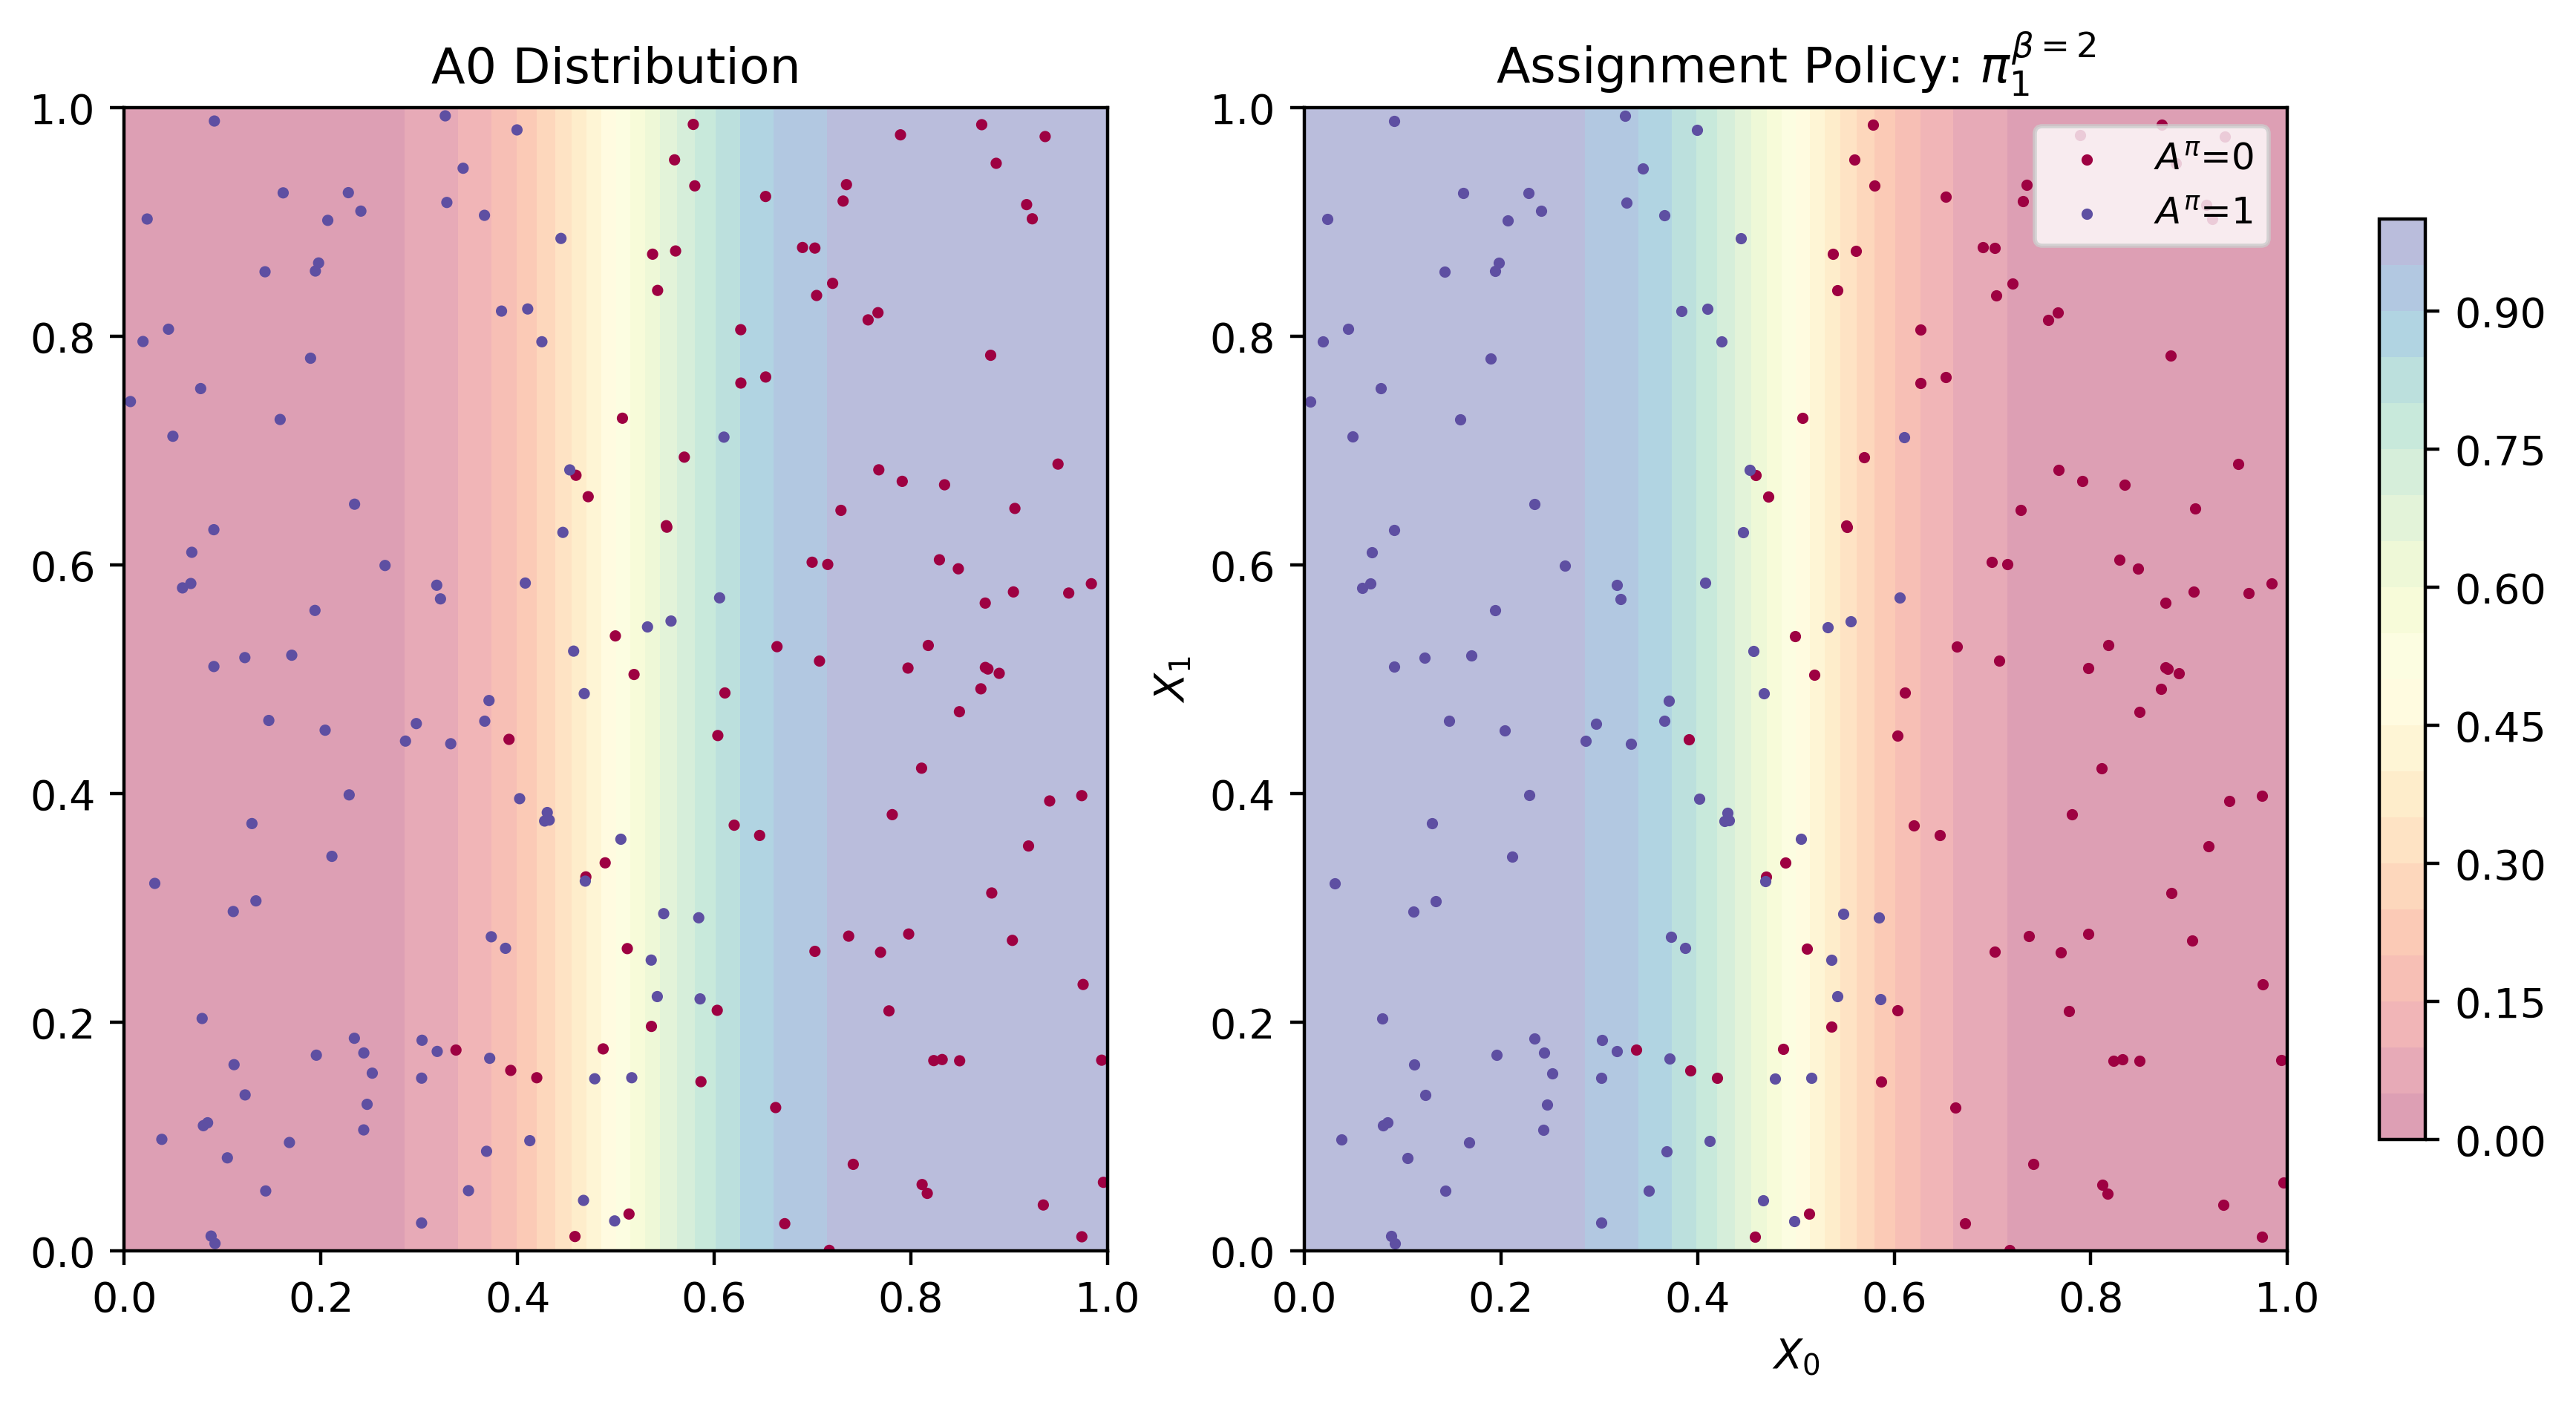

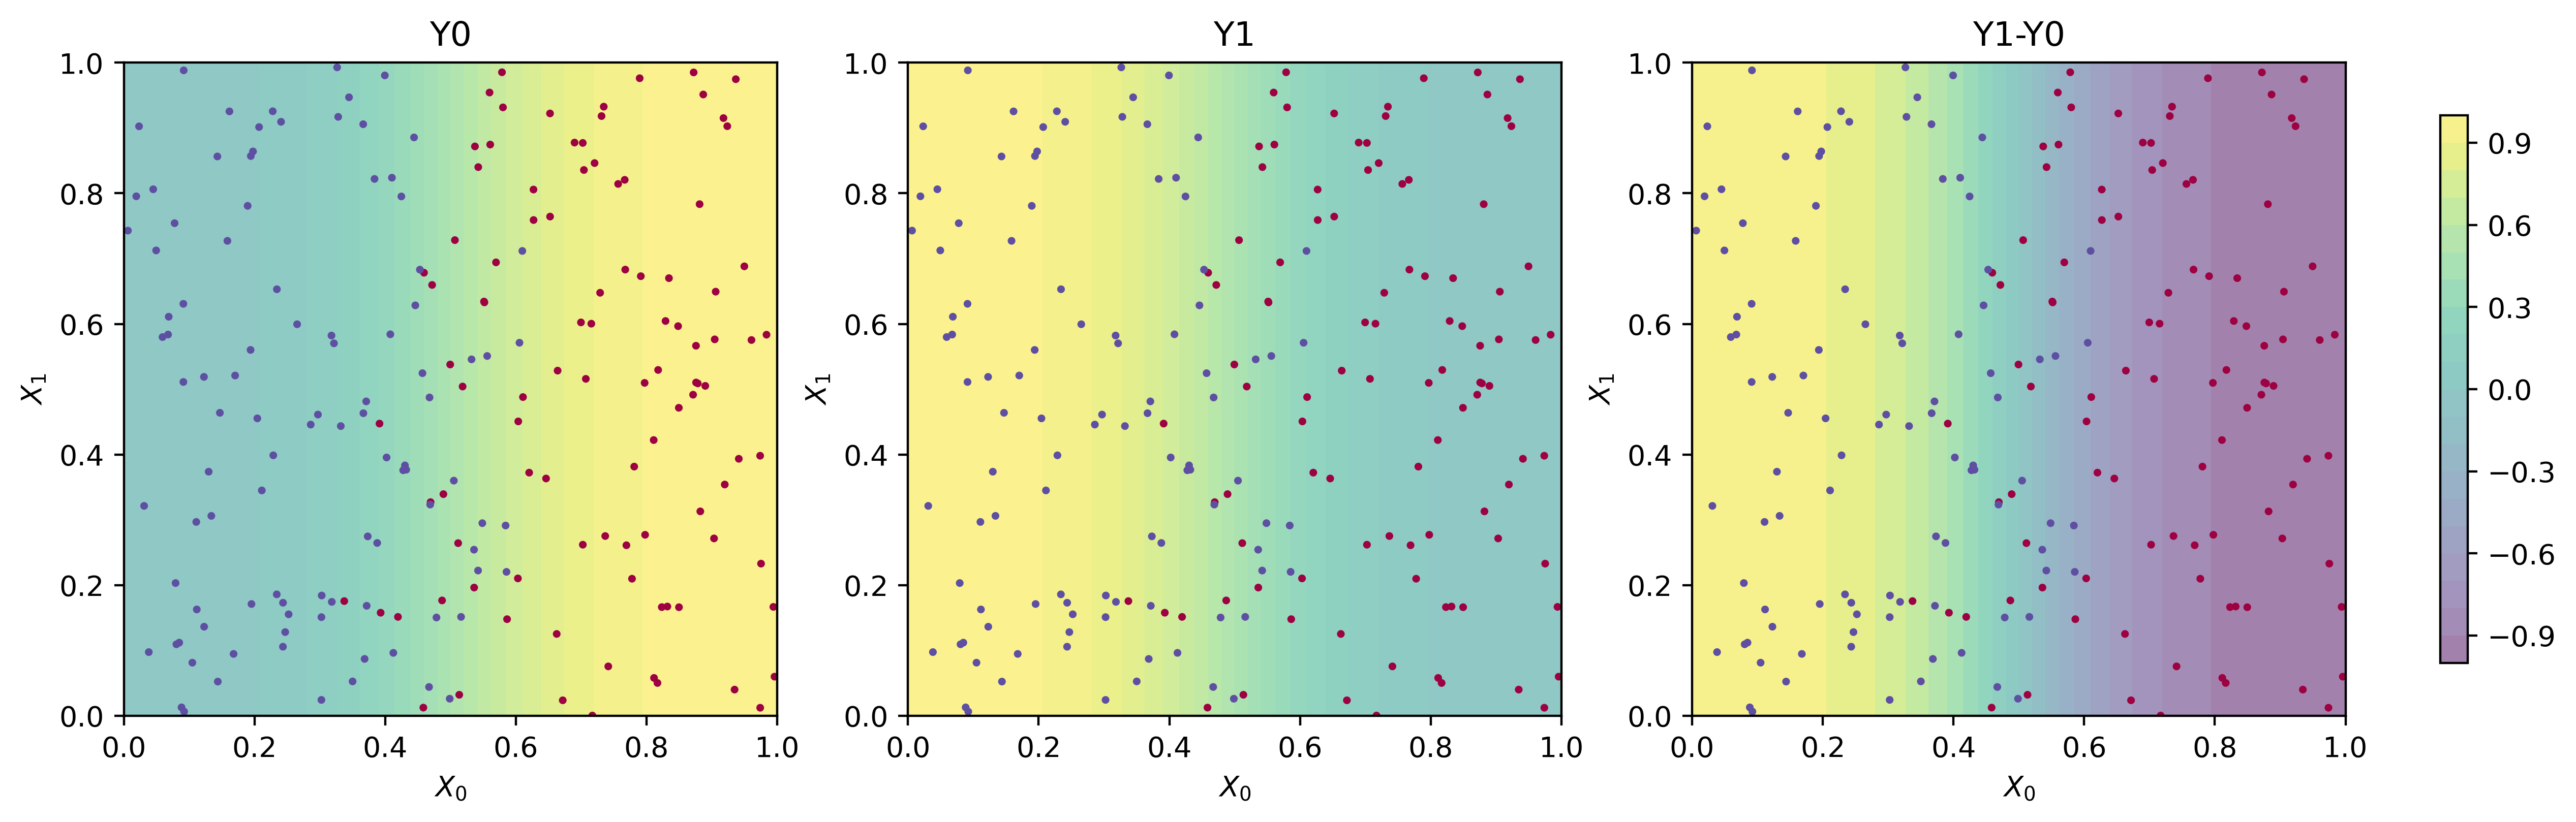

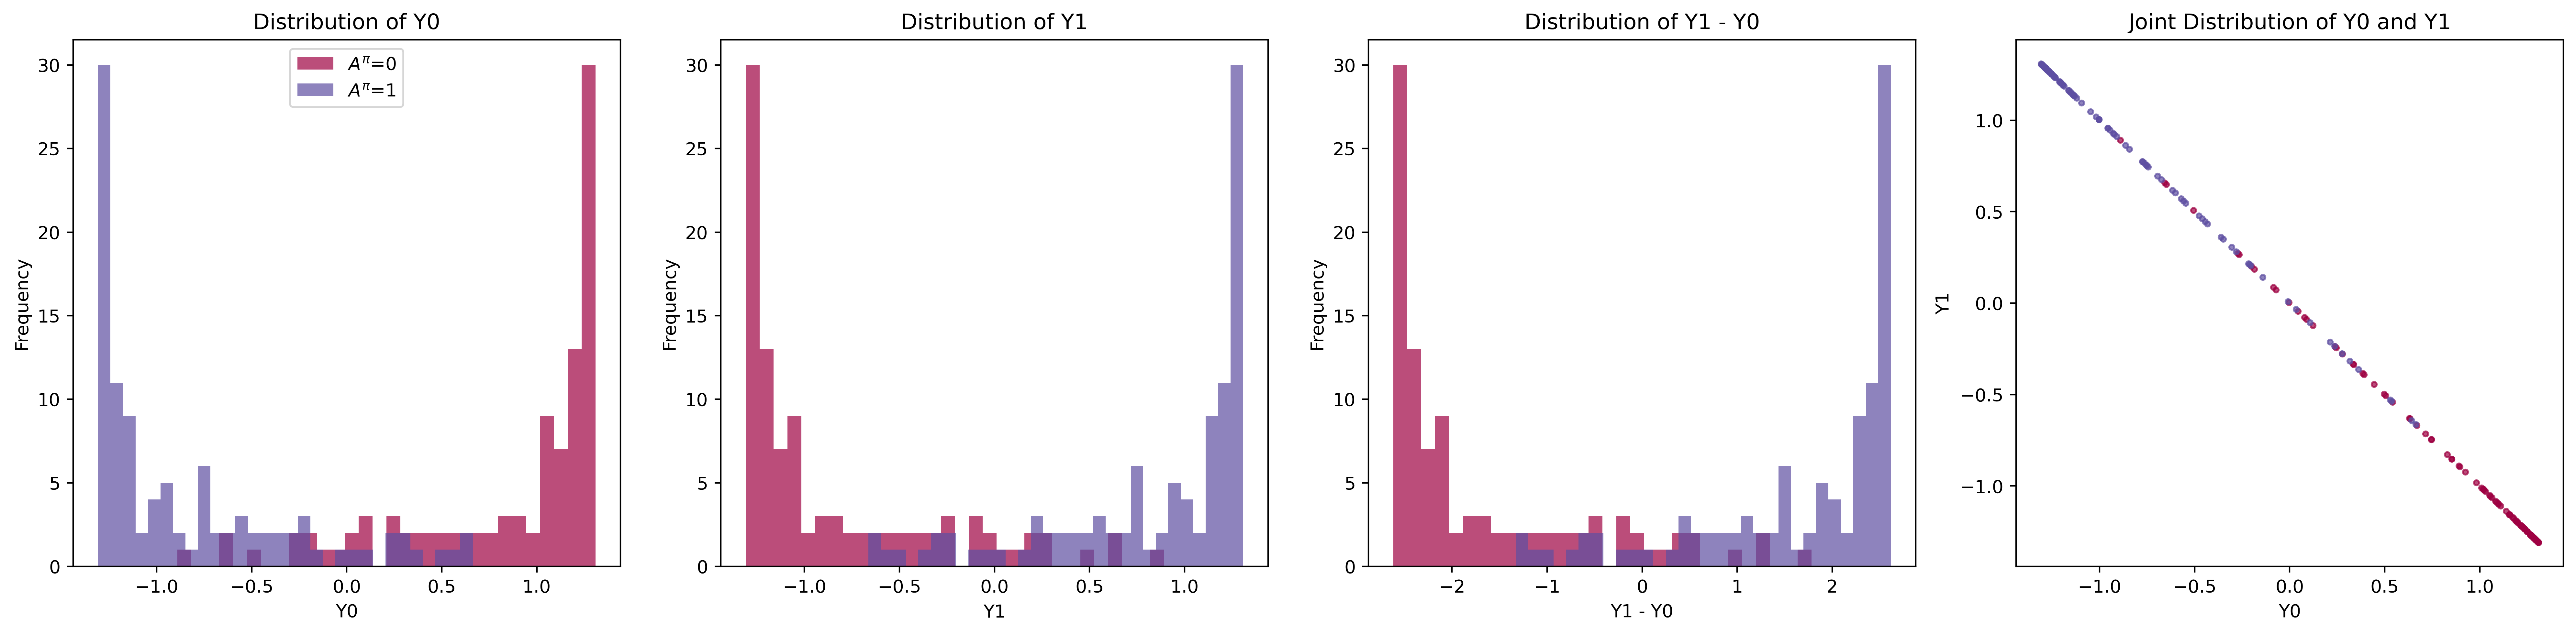

In [147]:
visualize_toy_data("ex1_nonlinear", 2, num_points_grid, num_points, policy_name='1')

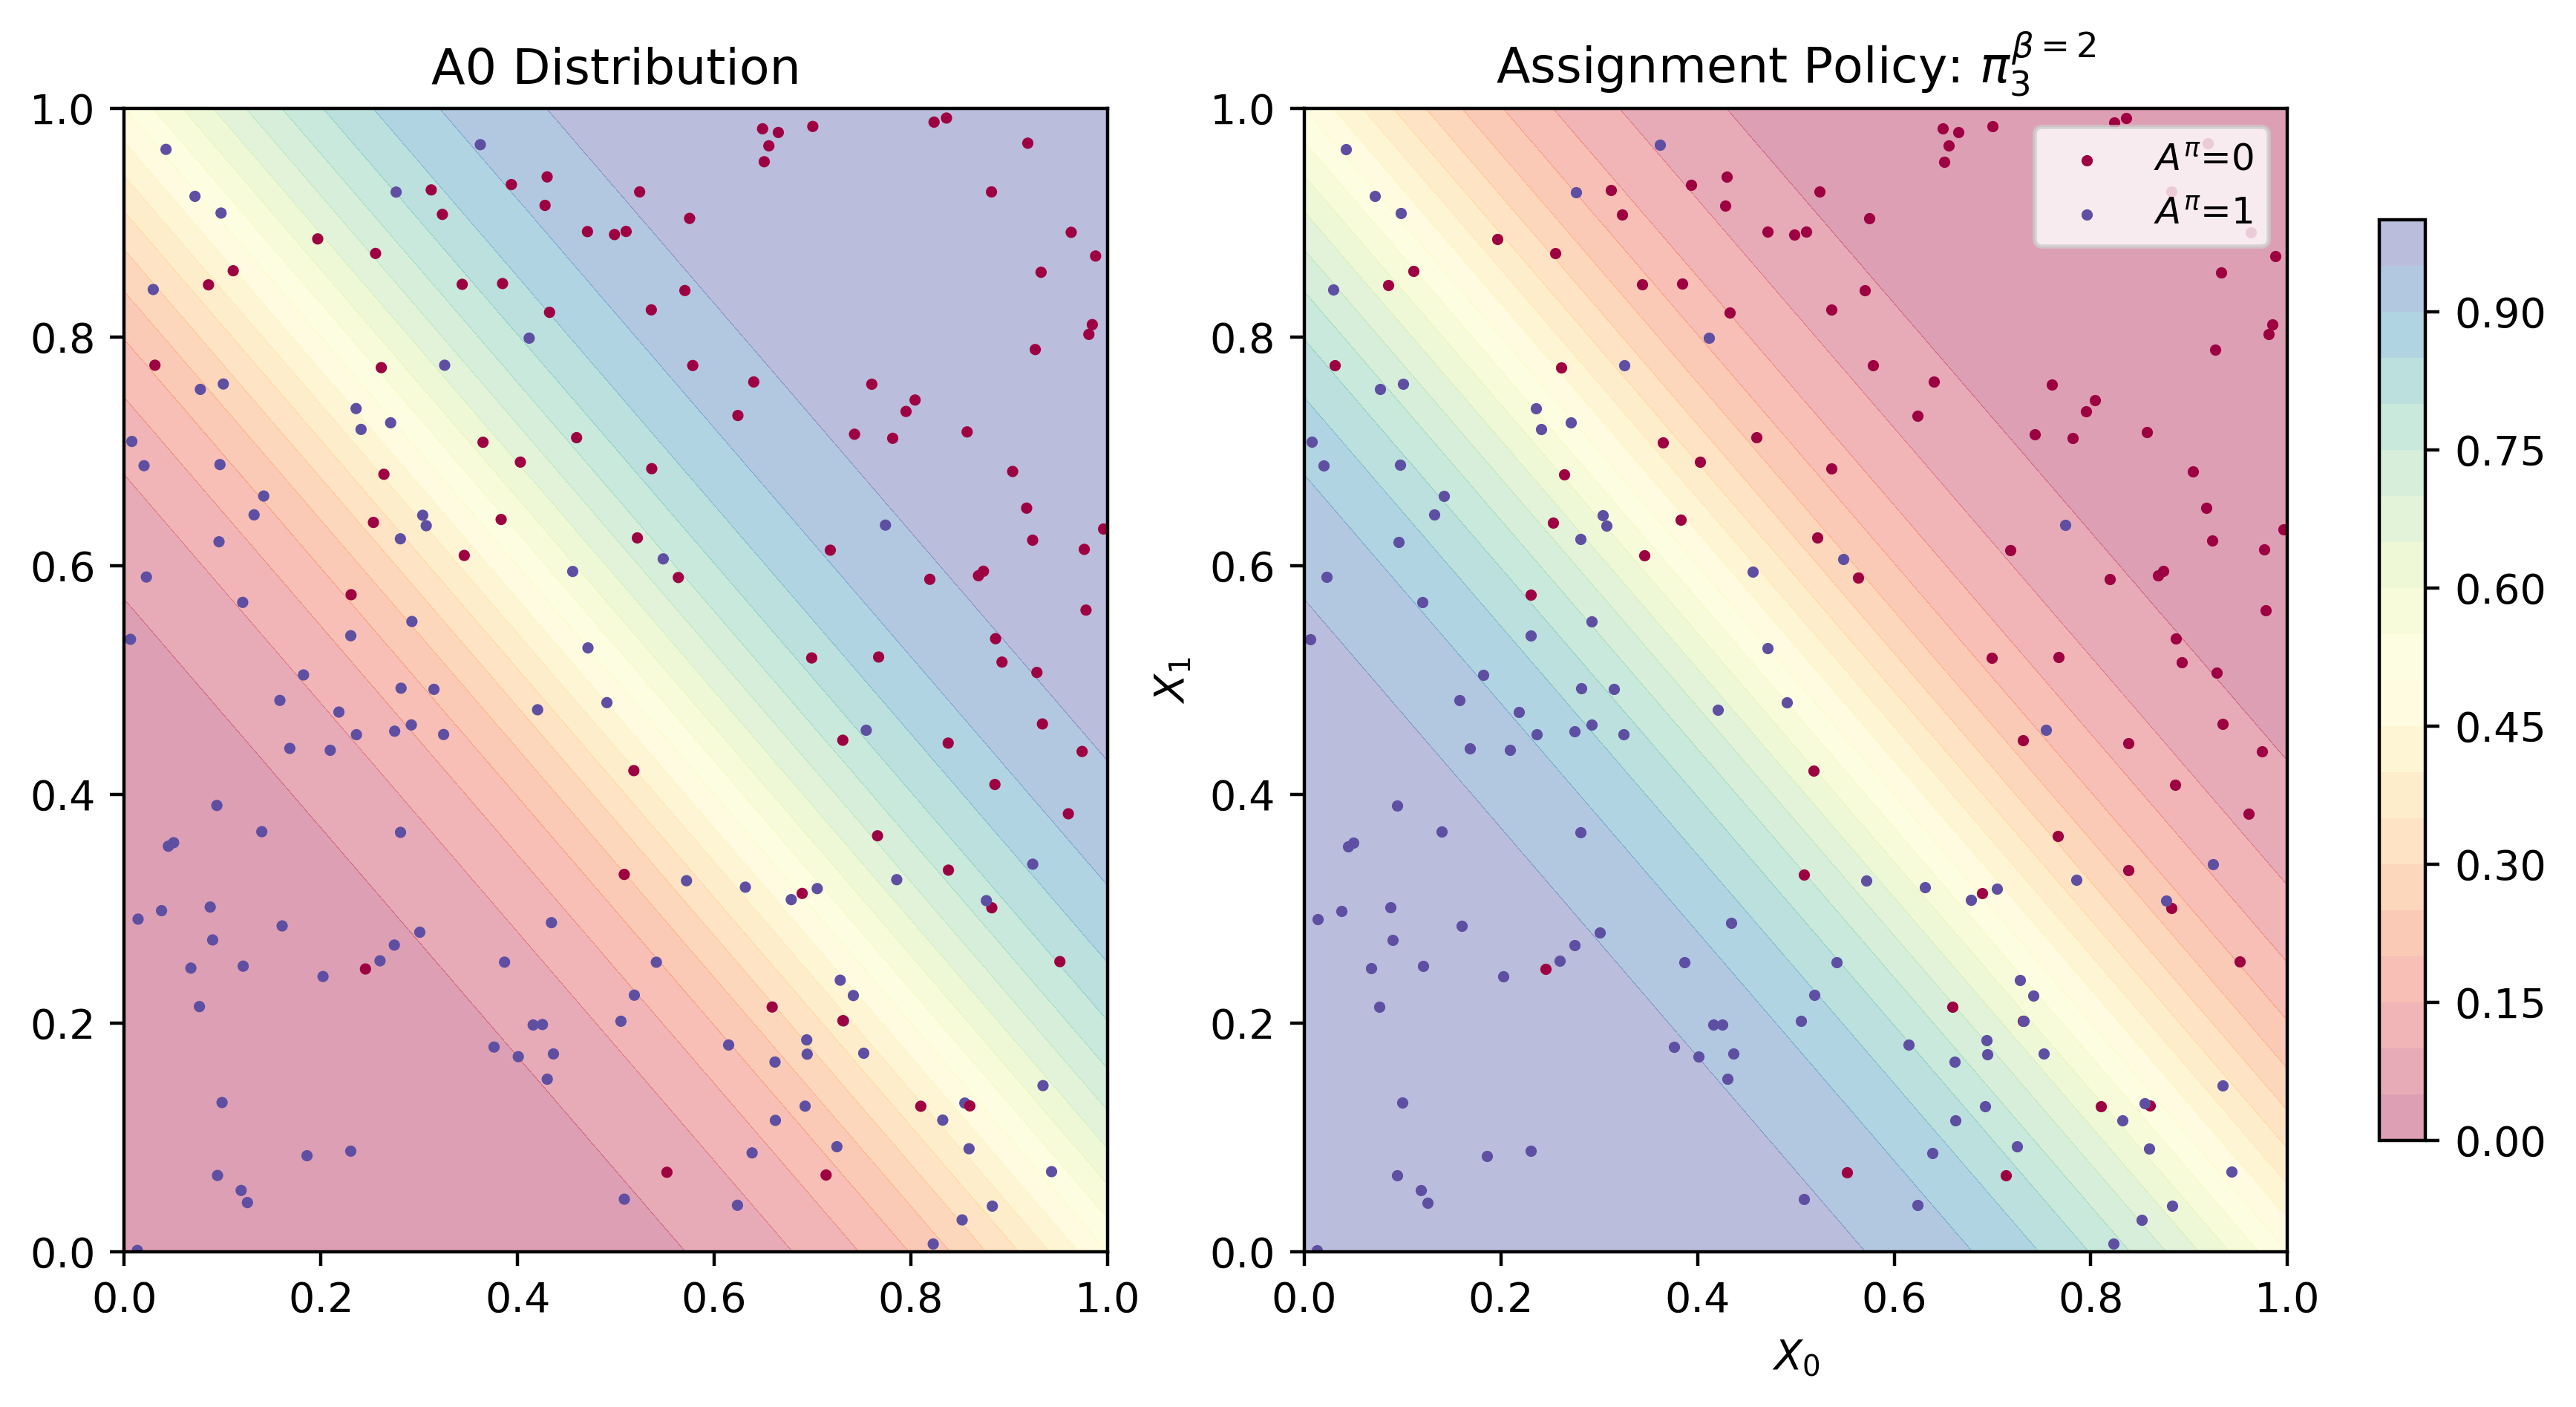

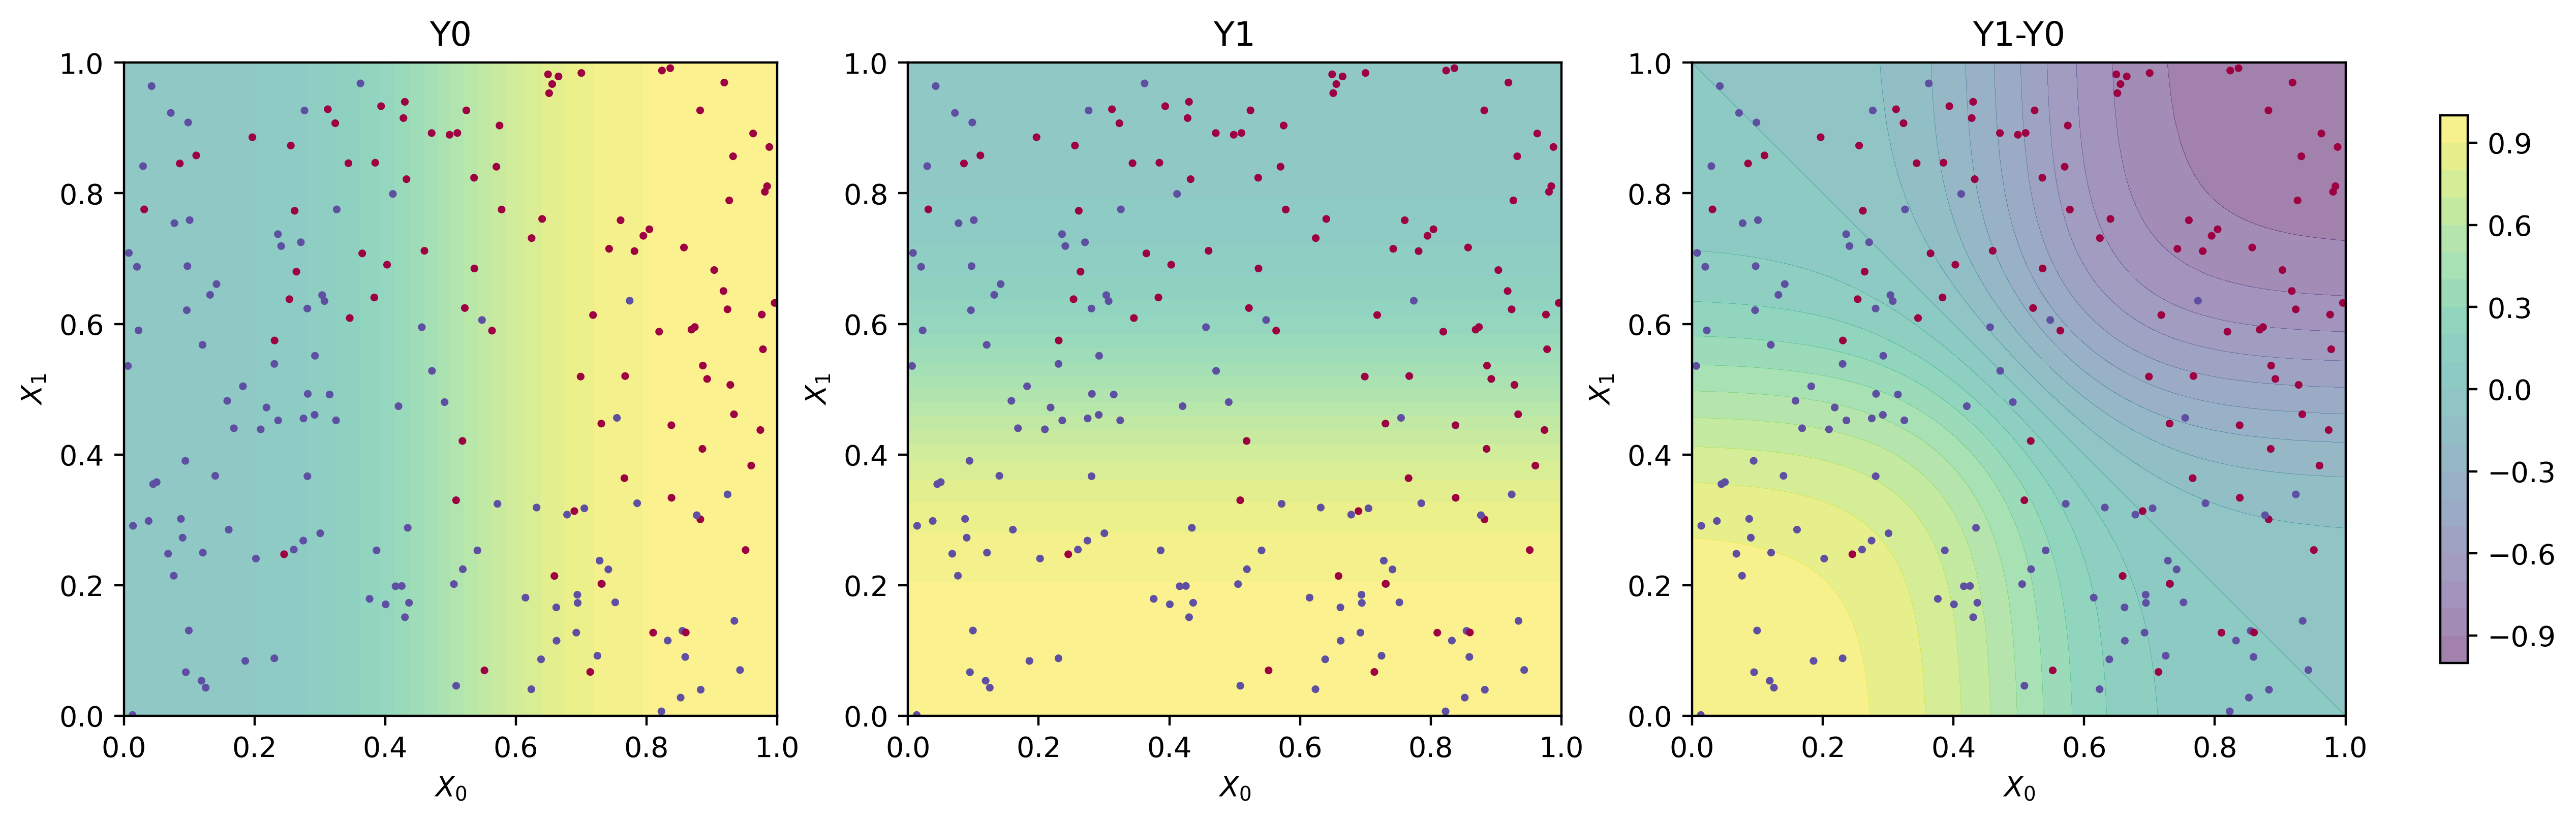

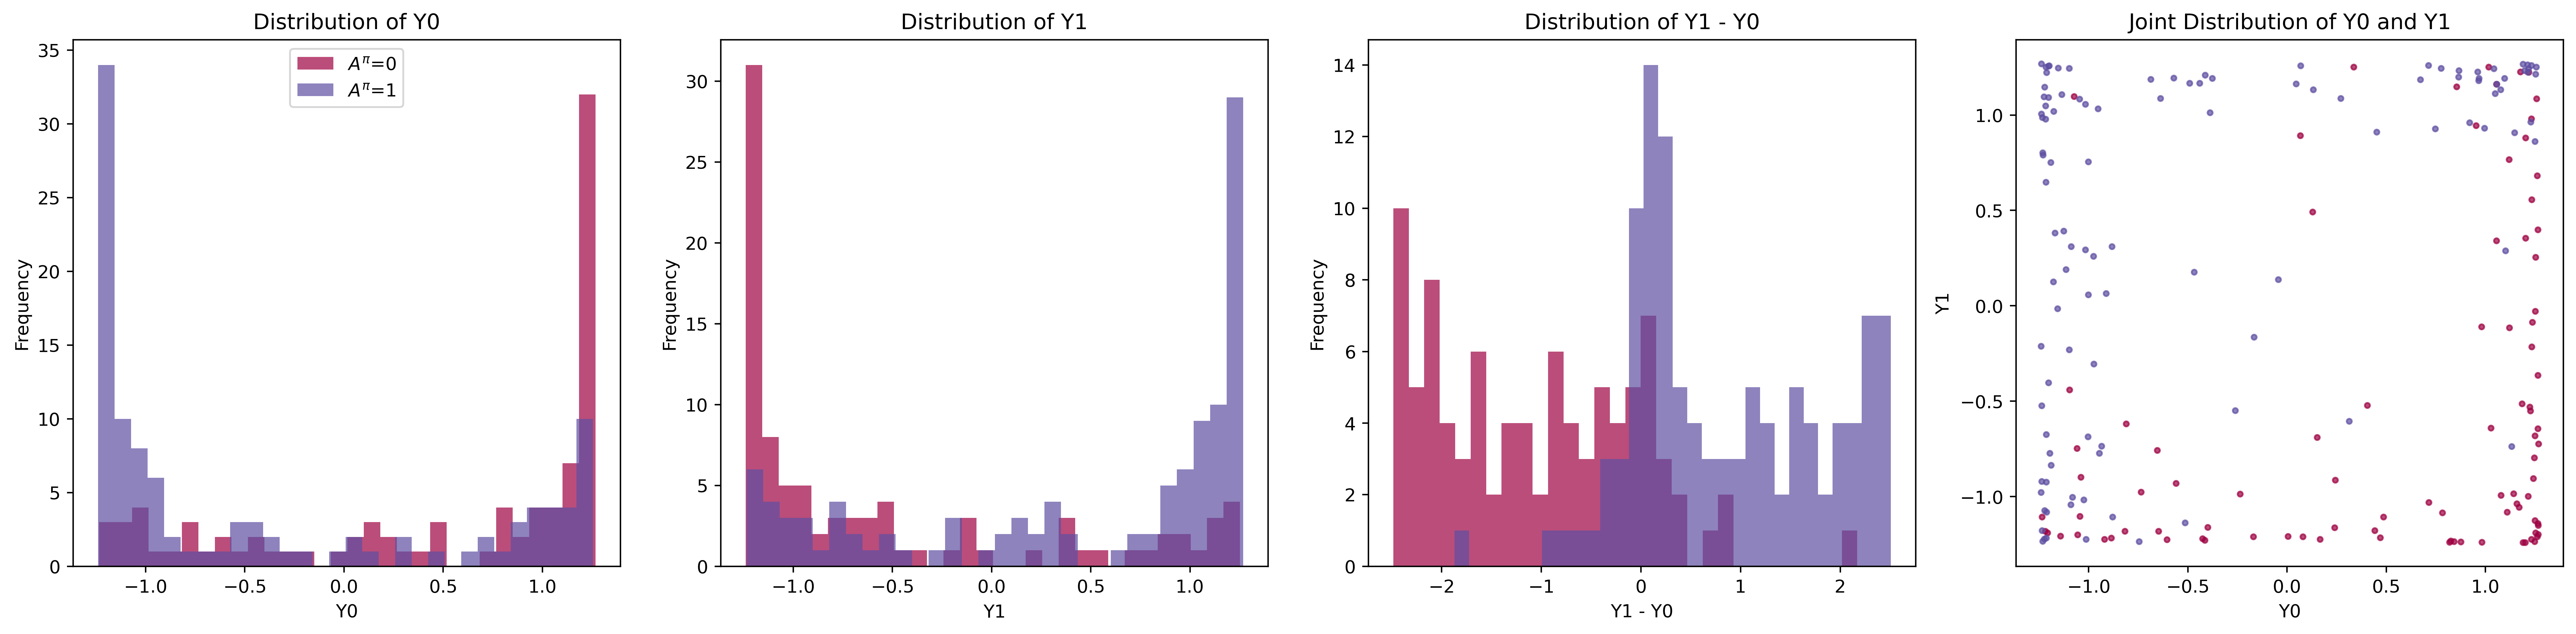

In [149]:
visualize_toy_data("ex2_nonlinear", 2, num_points_grid, num_points, policy_name='3')

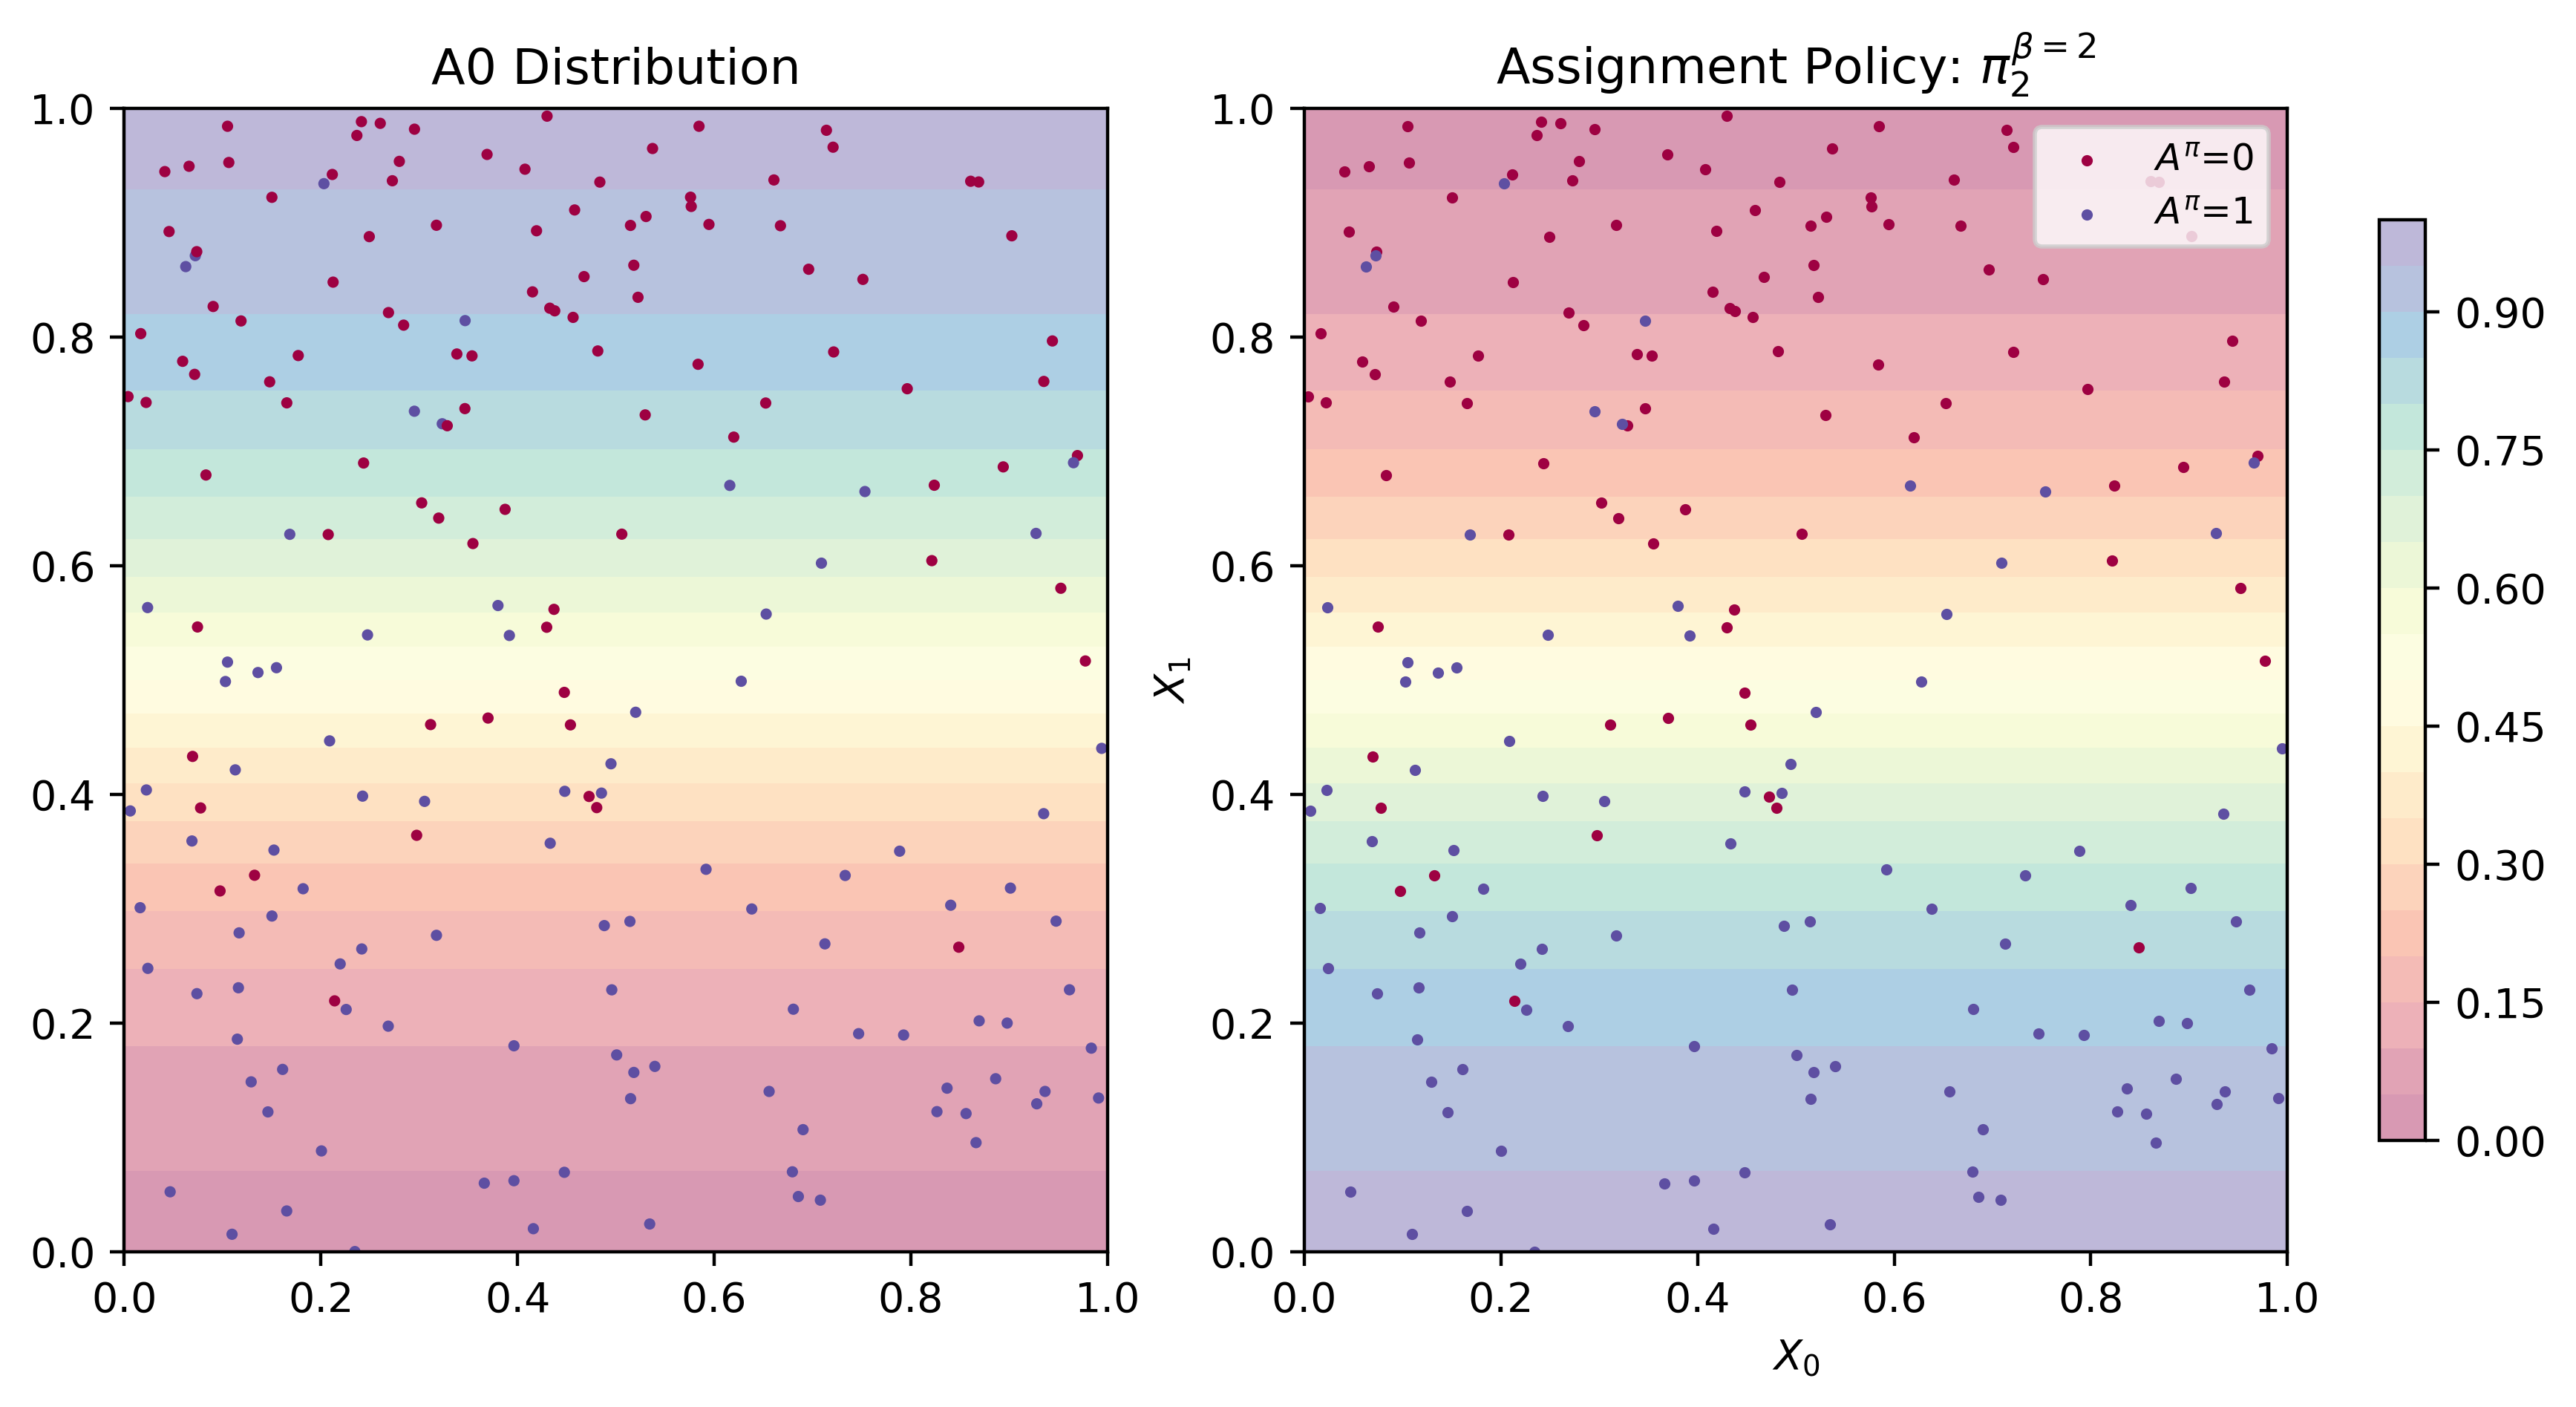

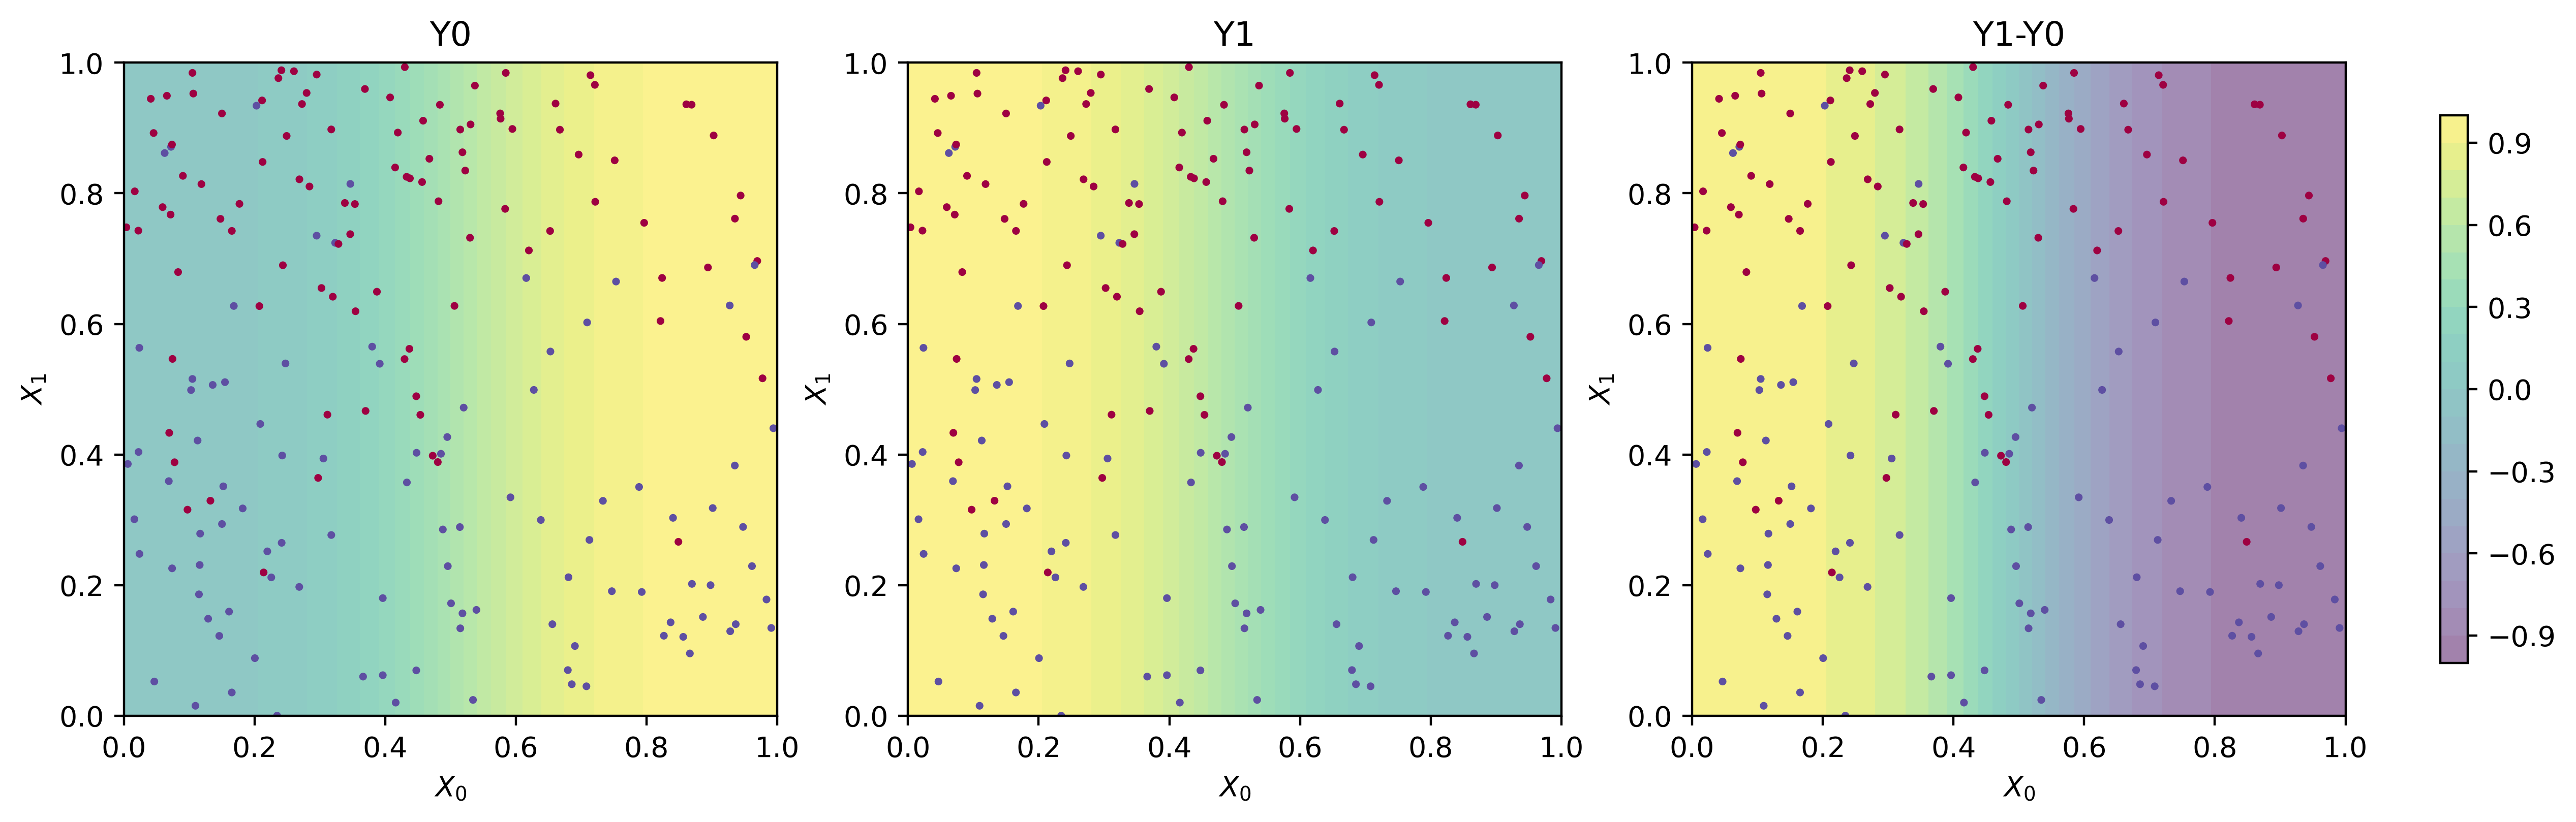

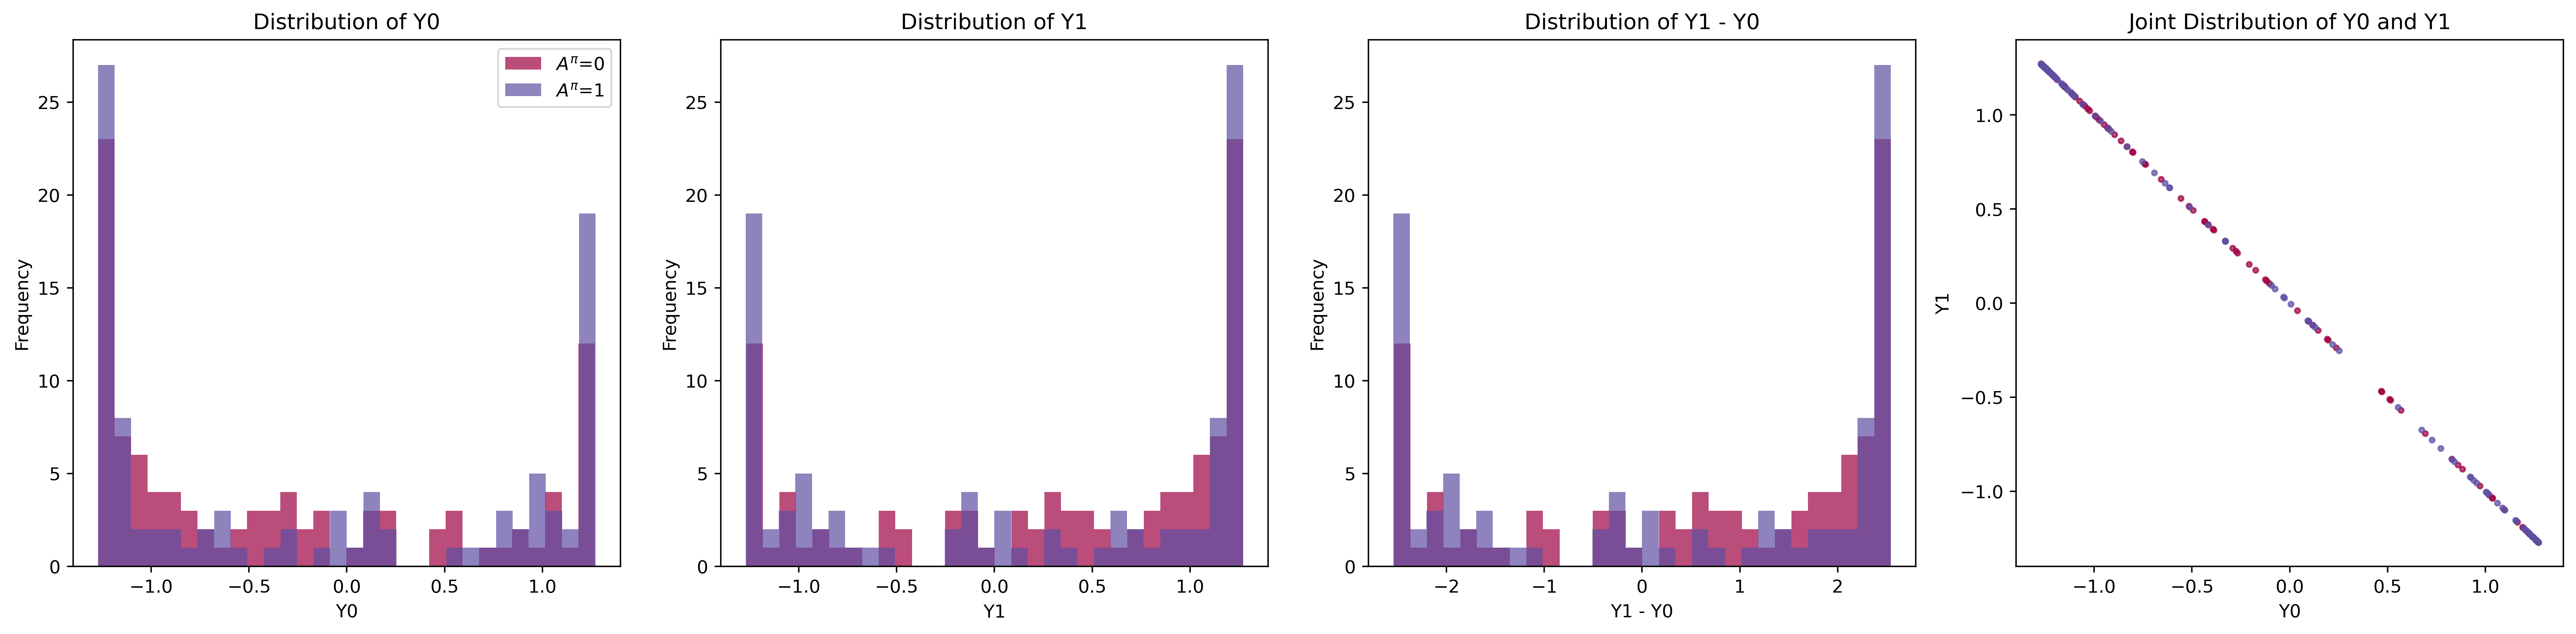

In [148]:
visualize_toy_data("ex3_nonlinear", propensity_scale, num_points_grid, num_points, policy_name='2')

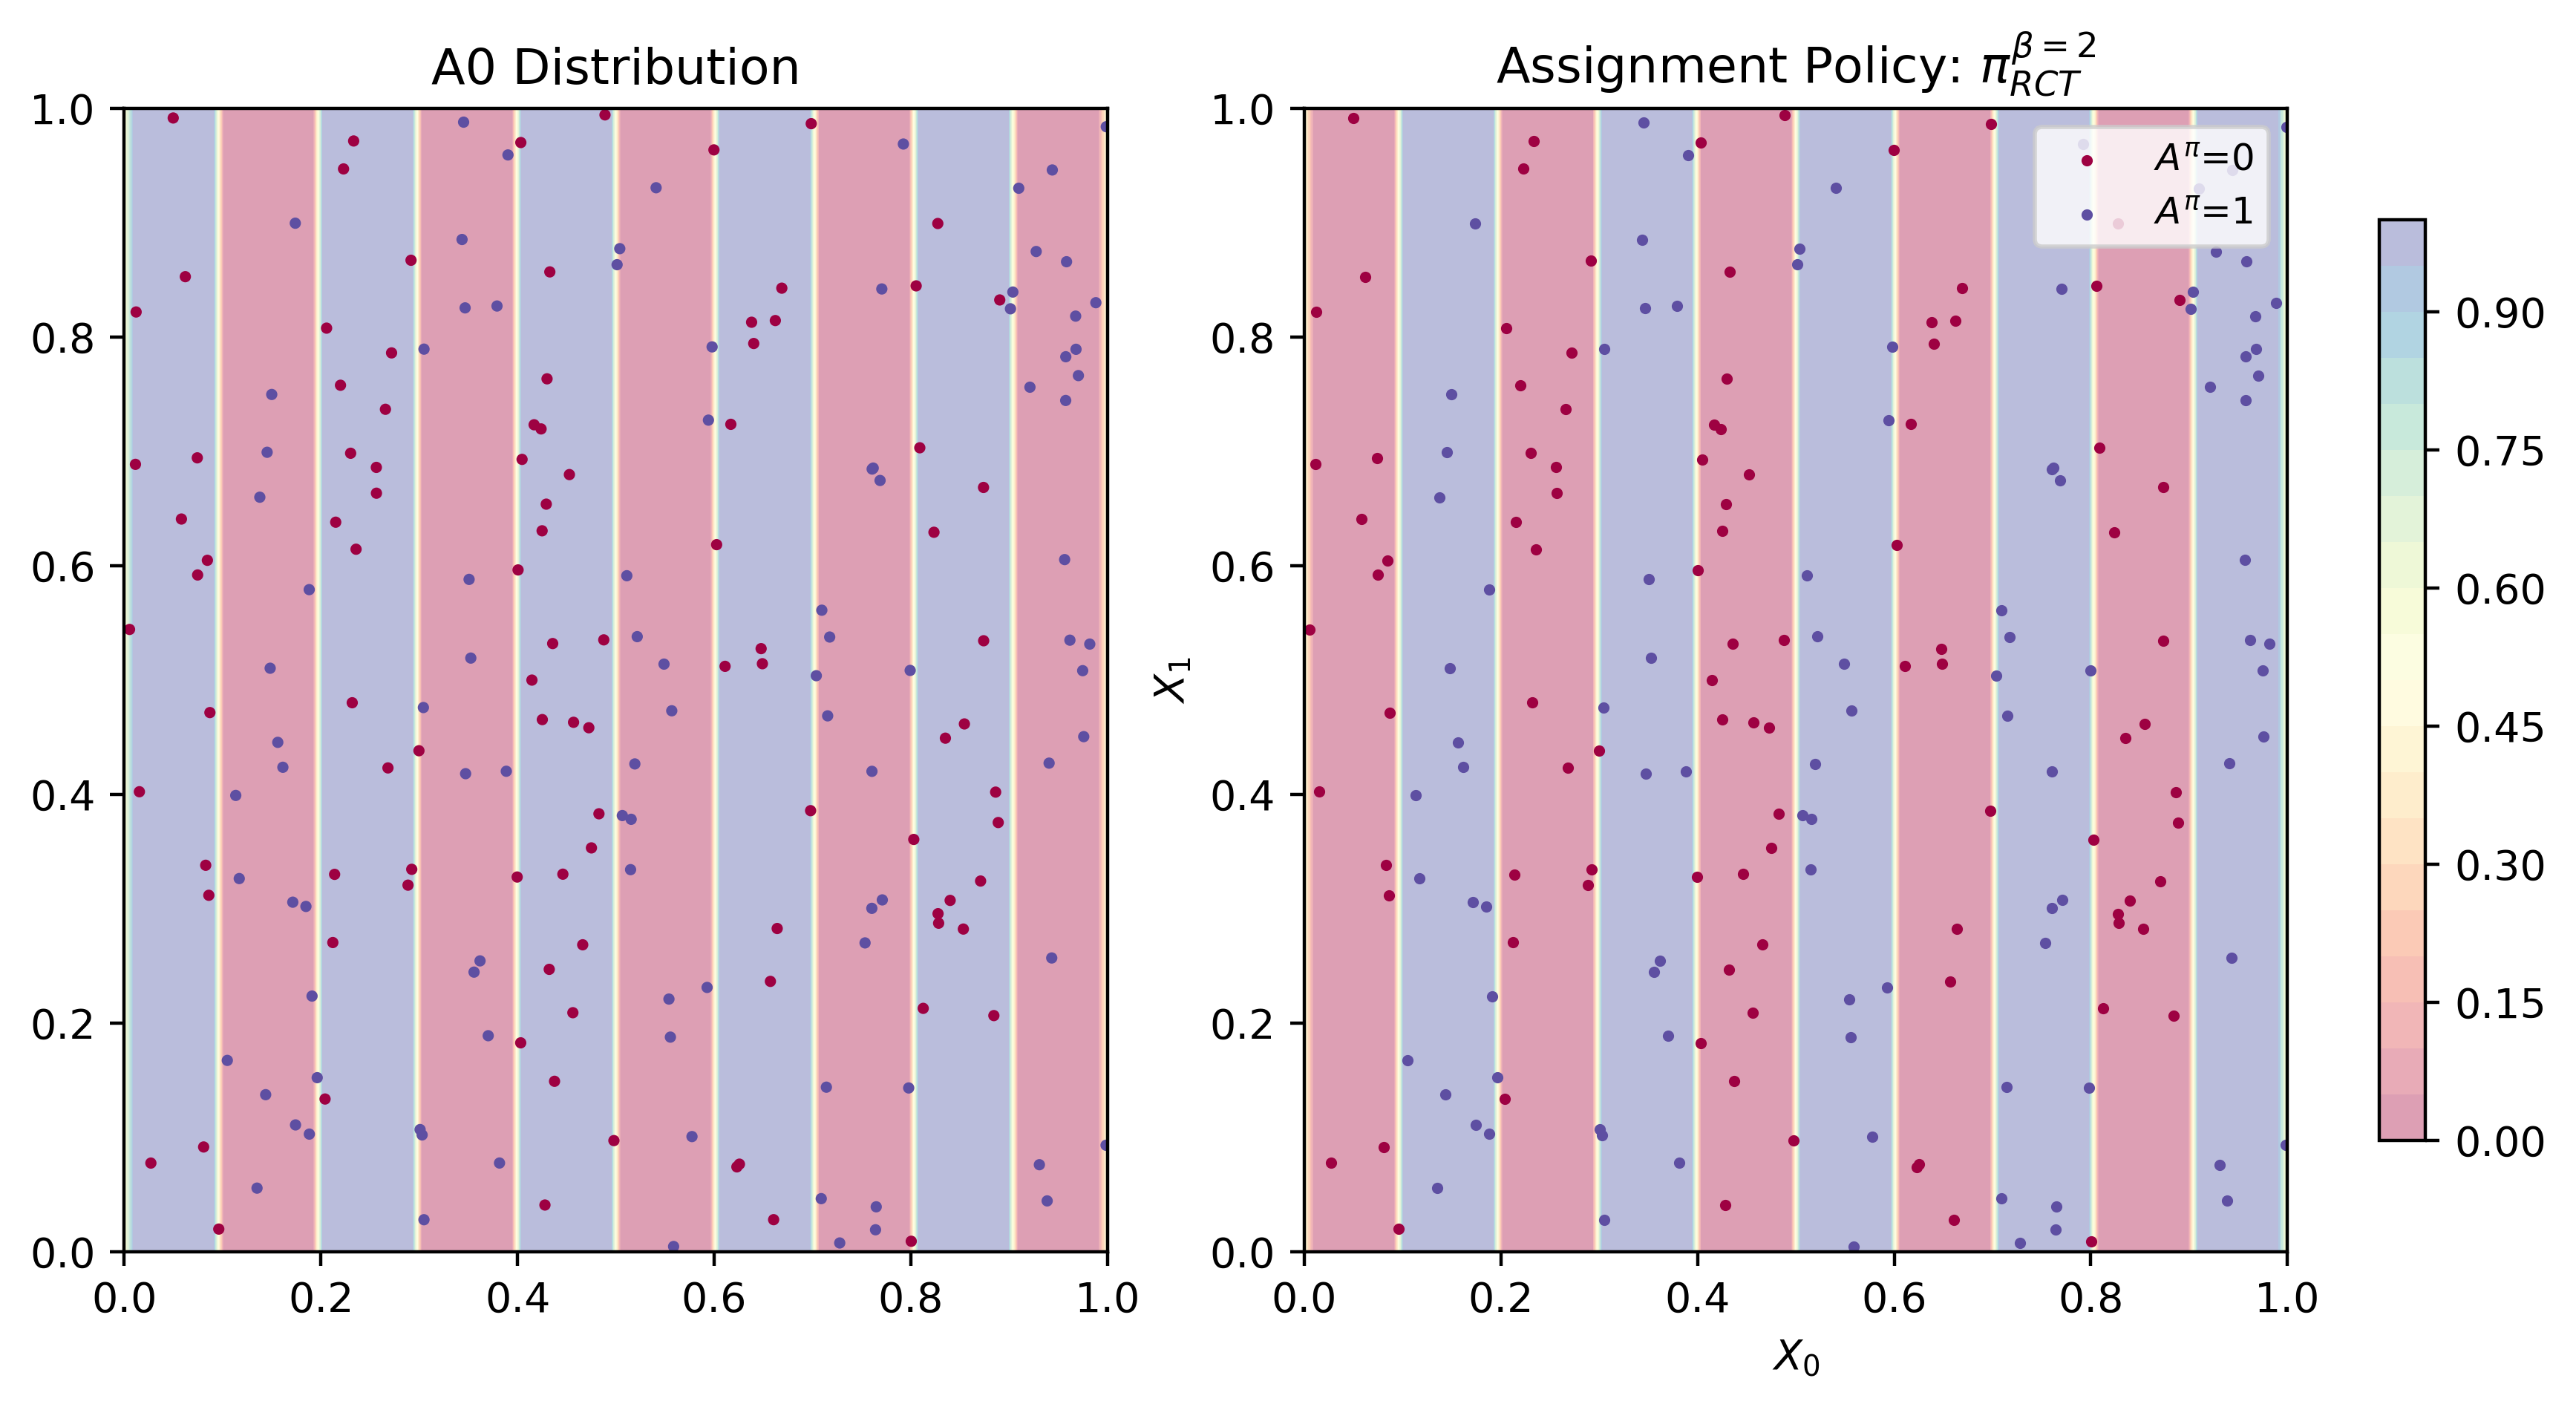

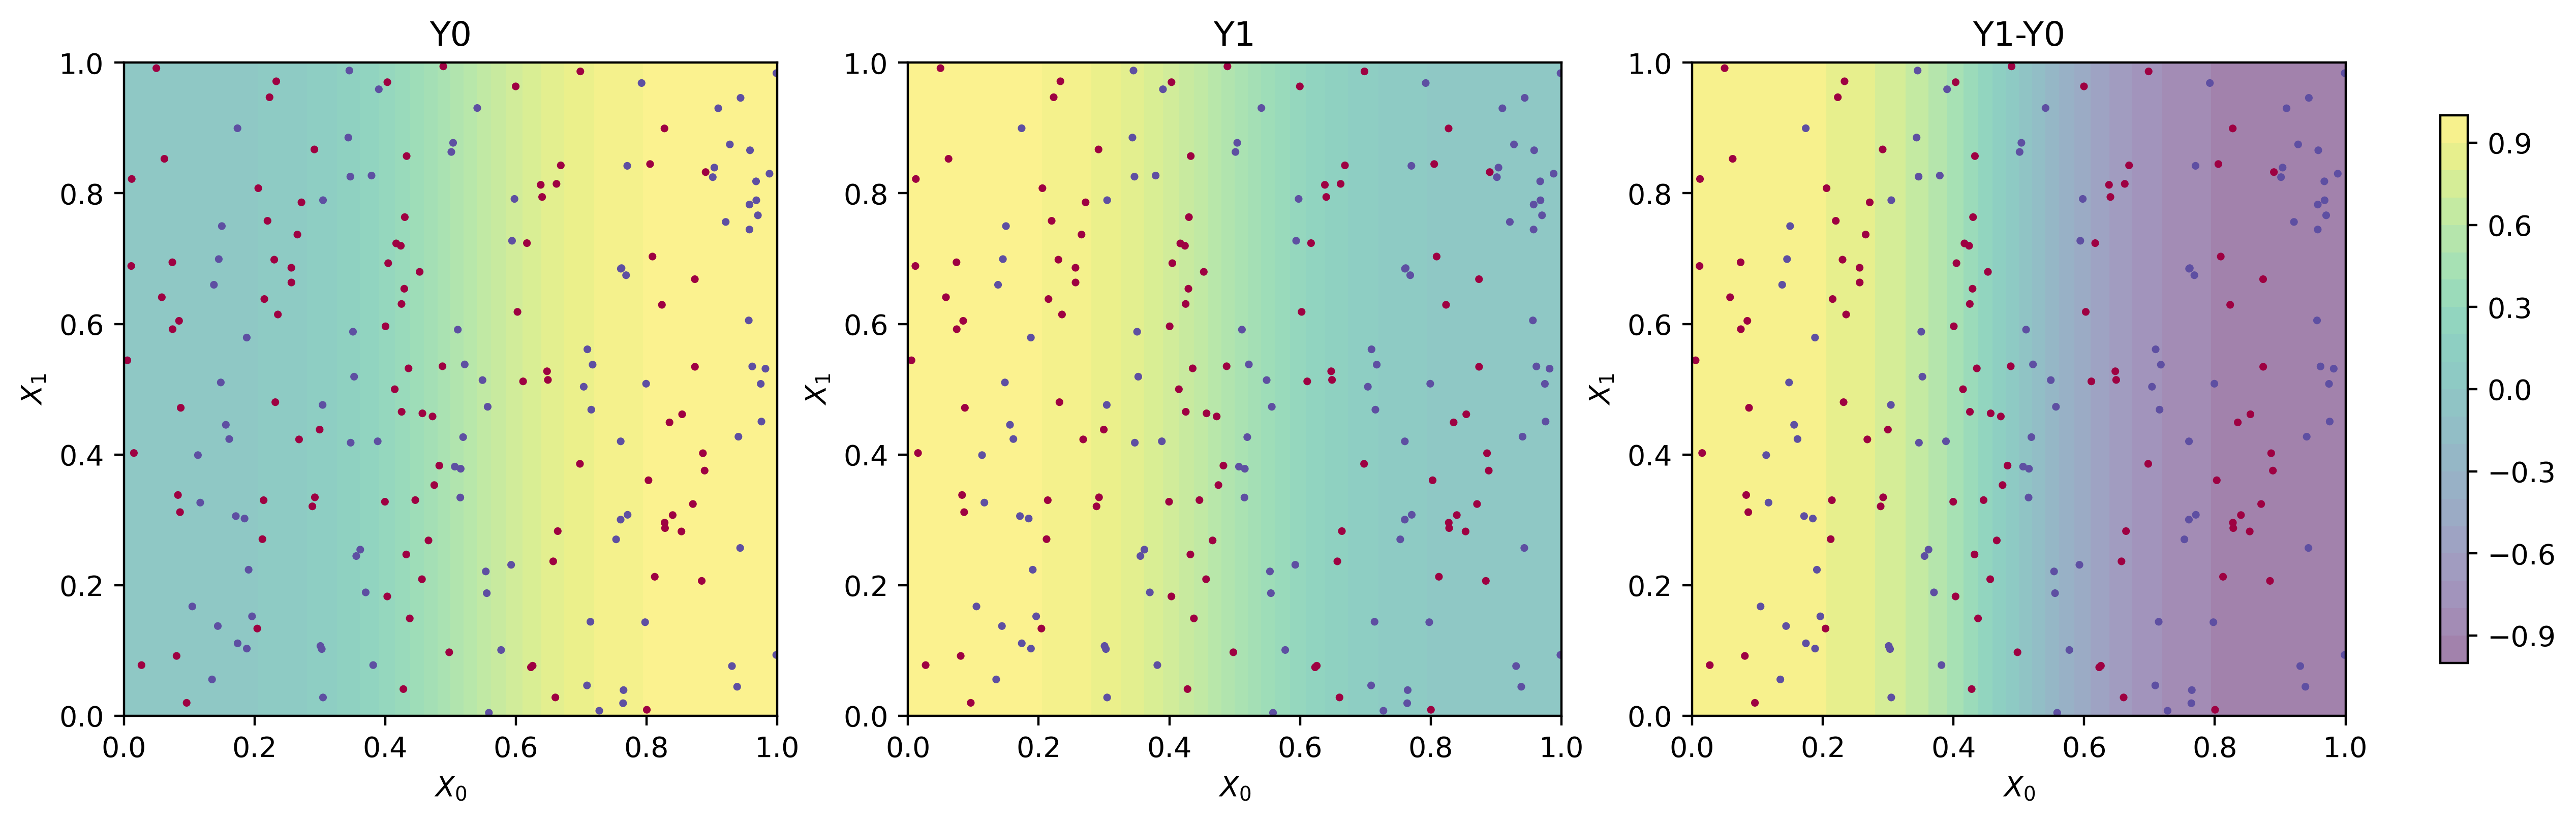

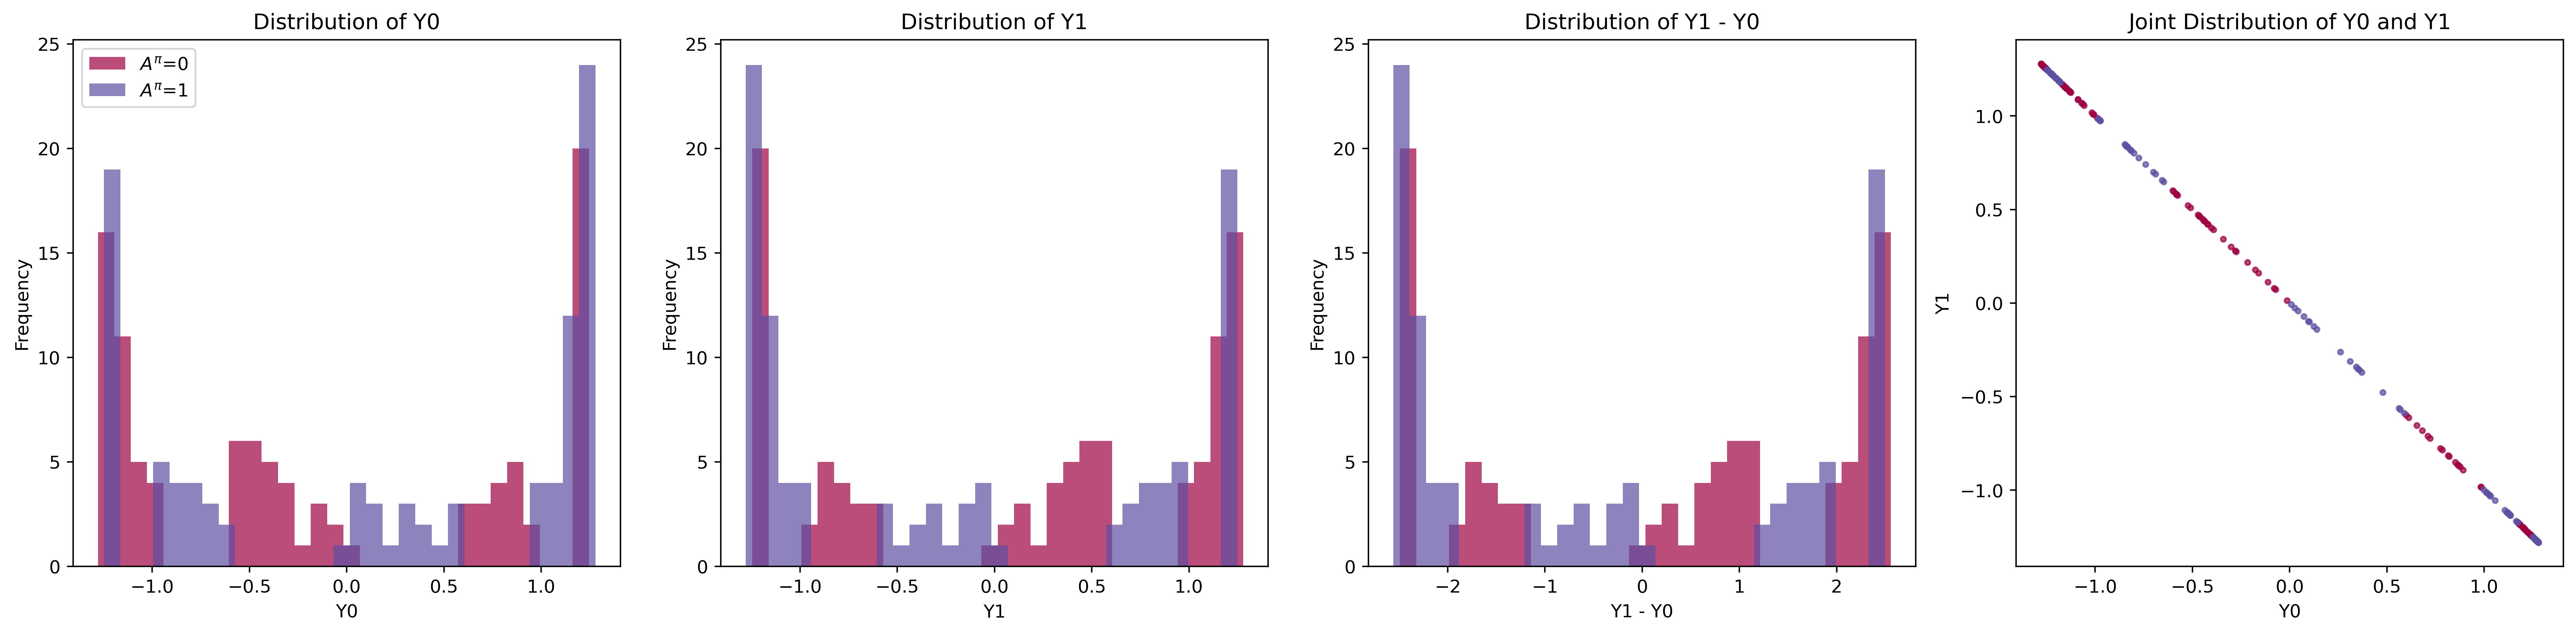

In [153]:
visualize_toy_data("ex4_nonlinear", 100, num_points_grid, num_points)

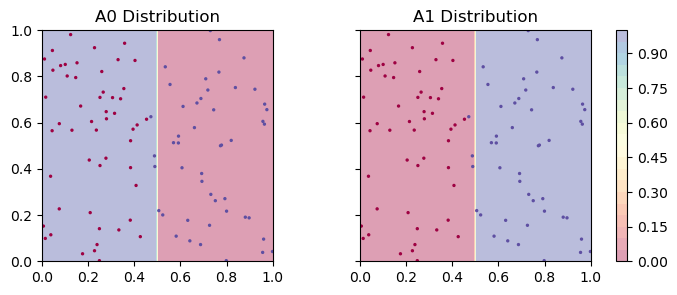

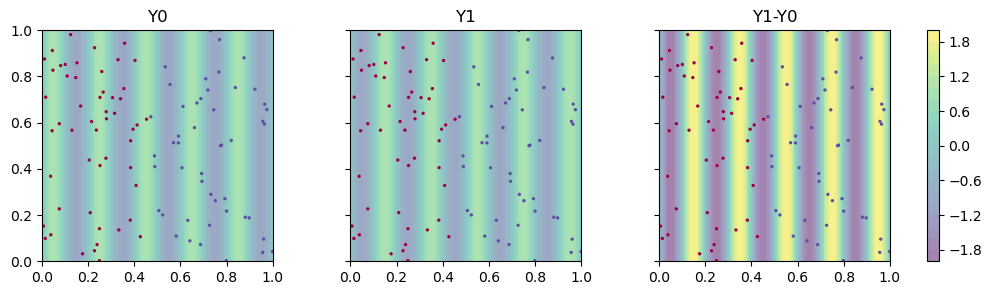

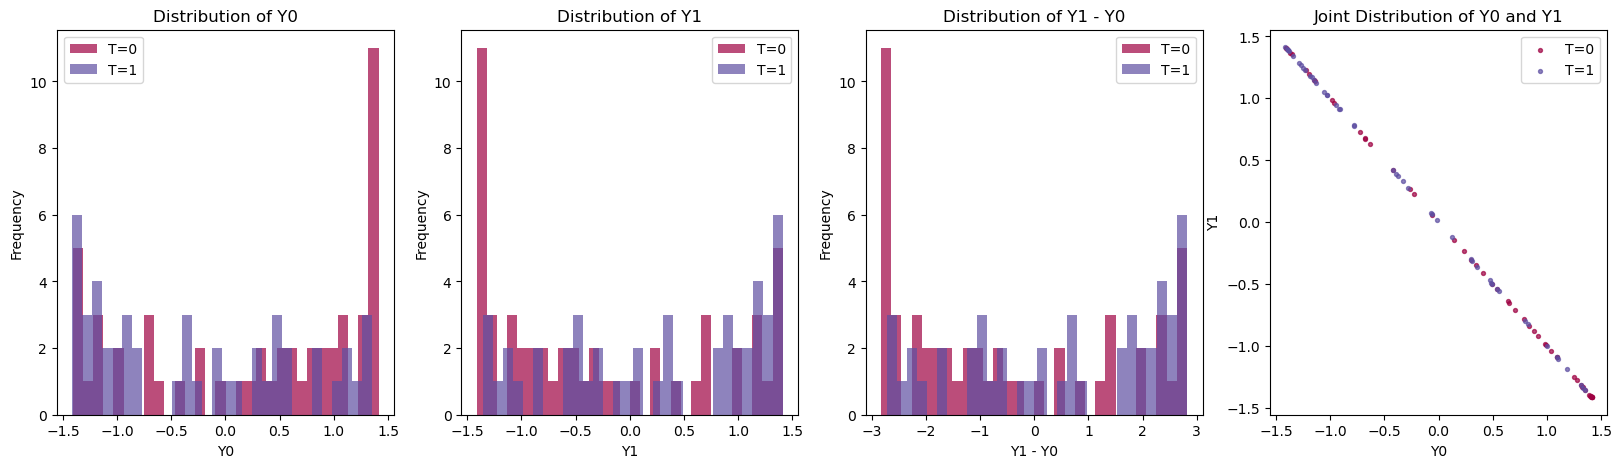

In [18]:
visualize_toy_data("ex5", propensity_scale, num_points_grid, num_points)

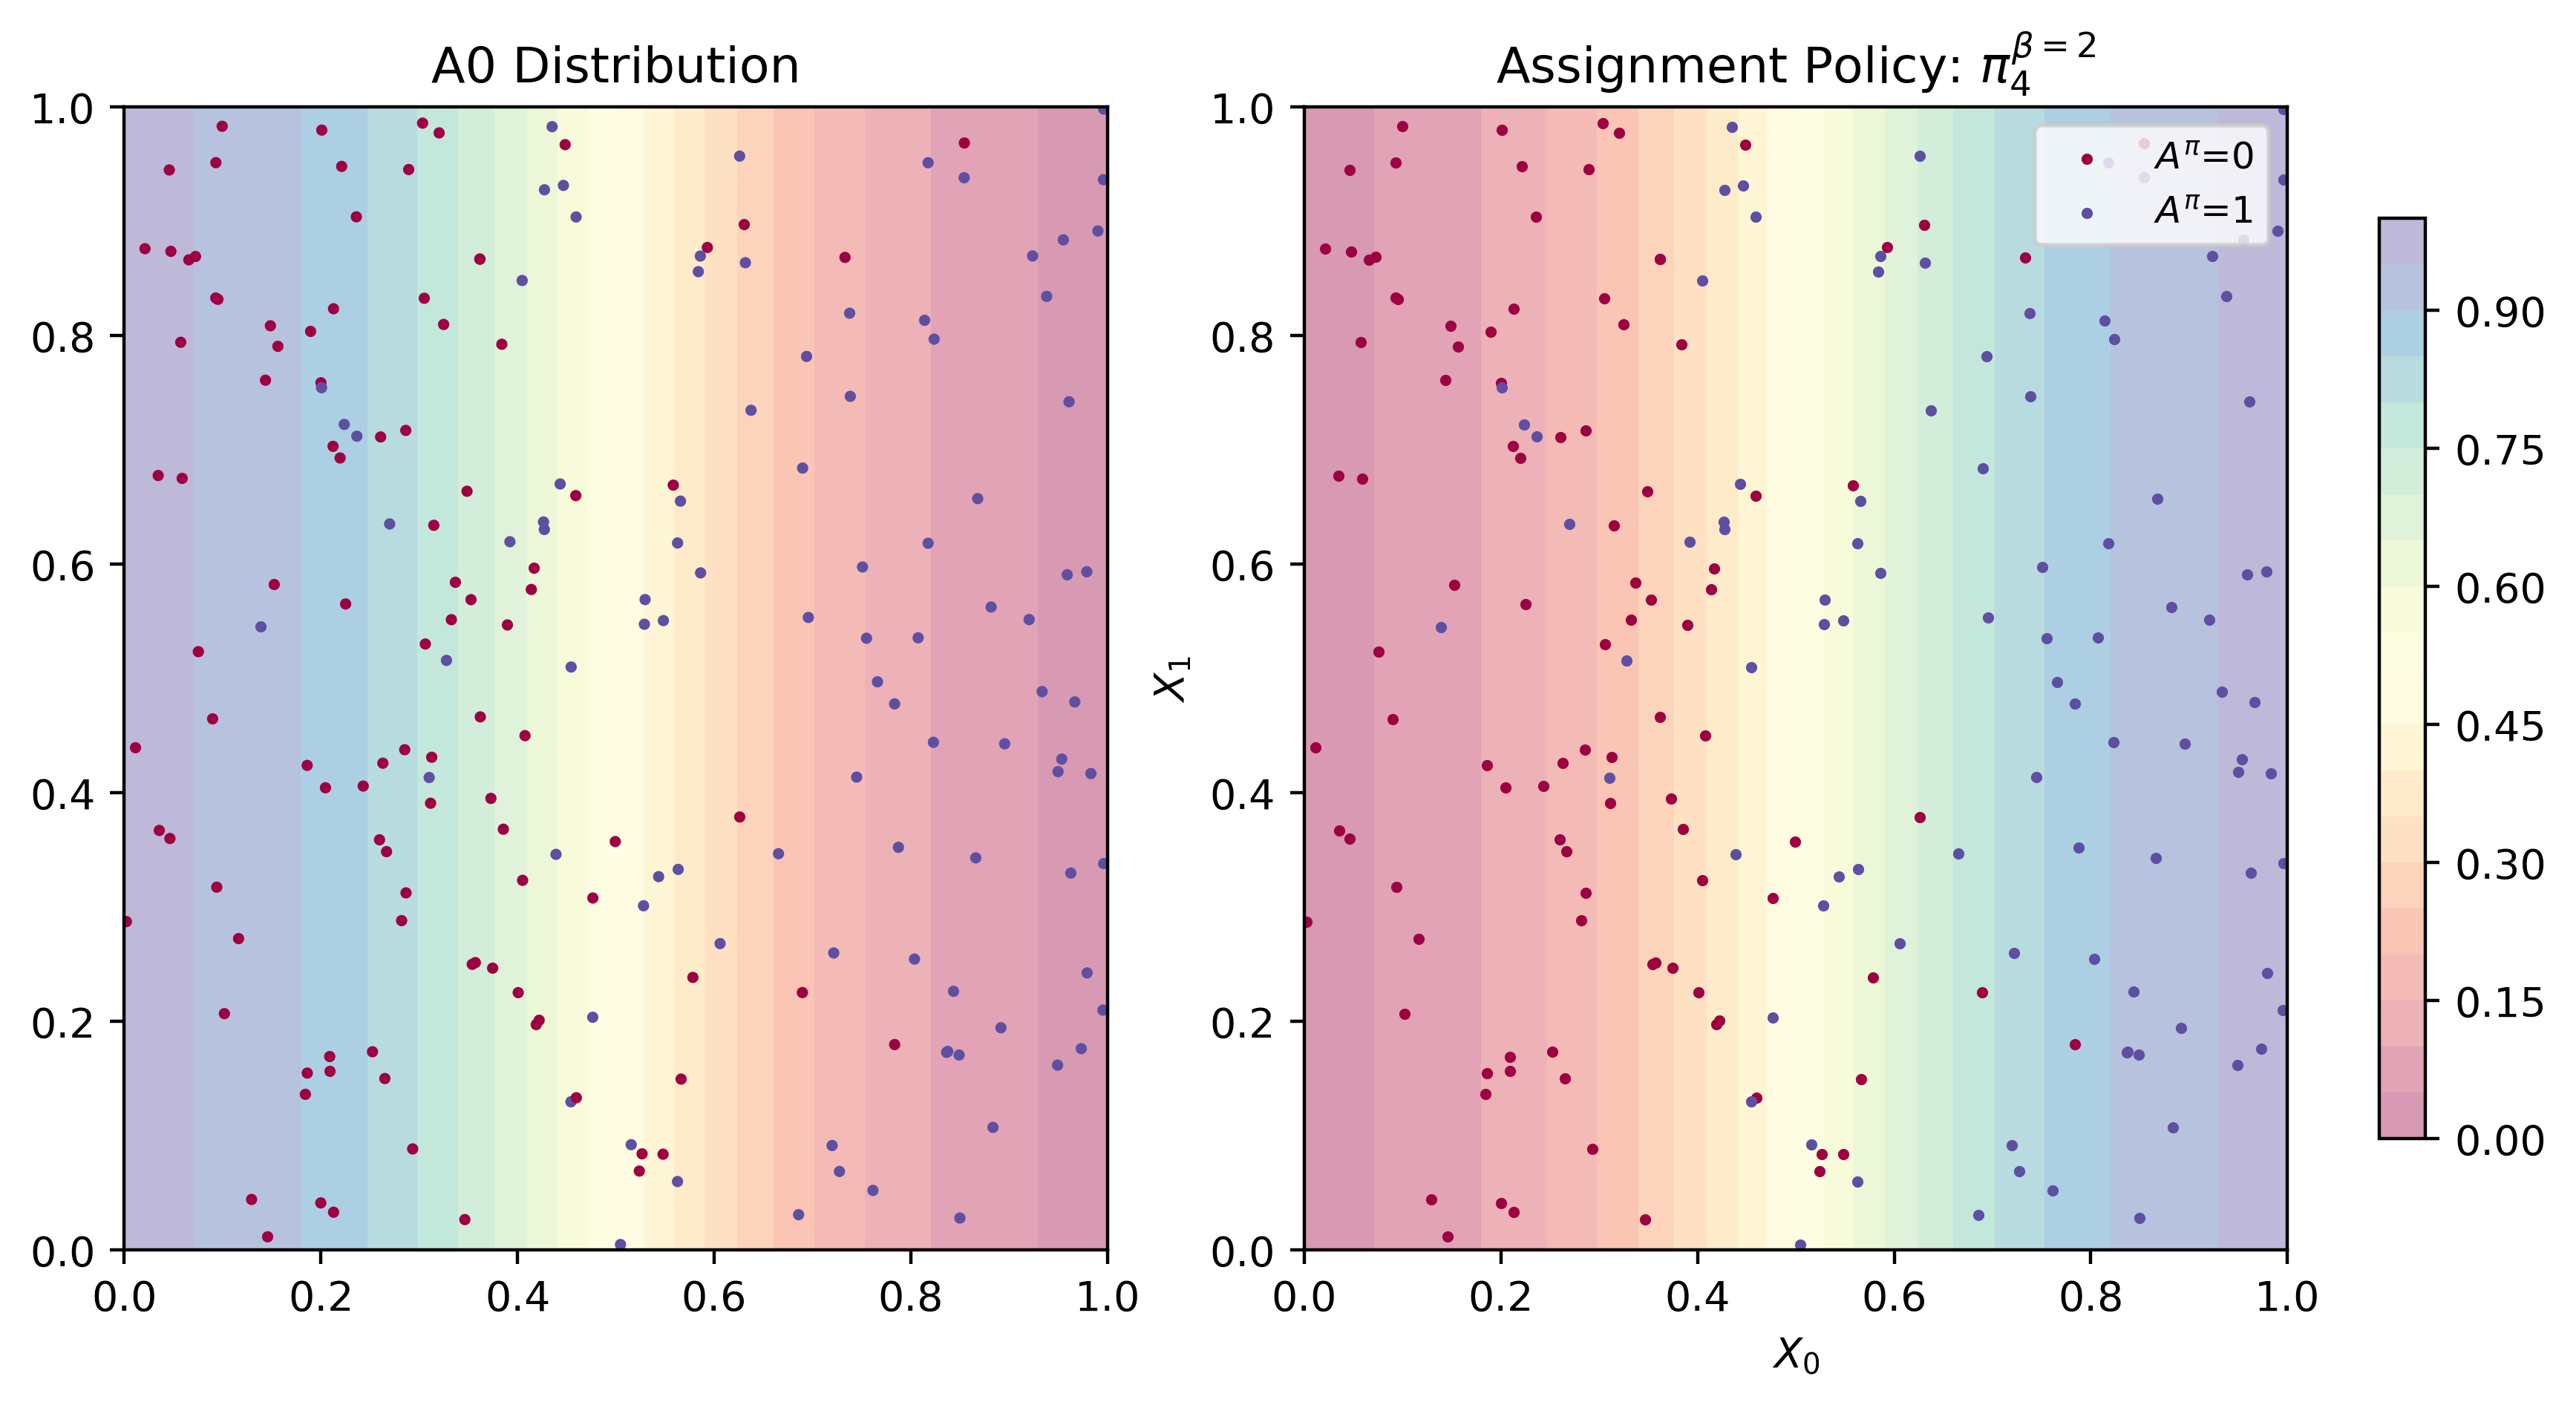

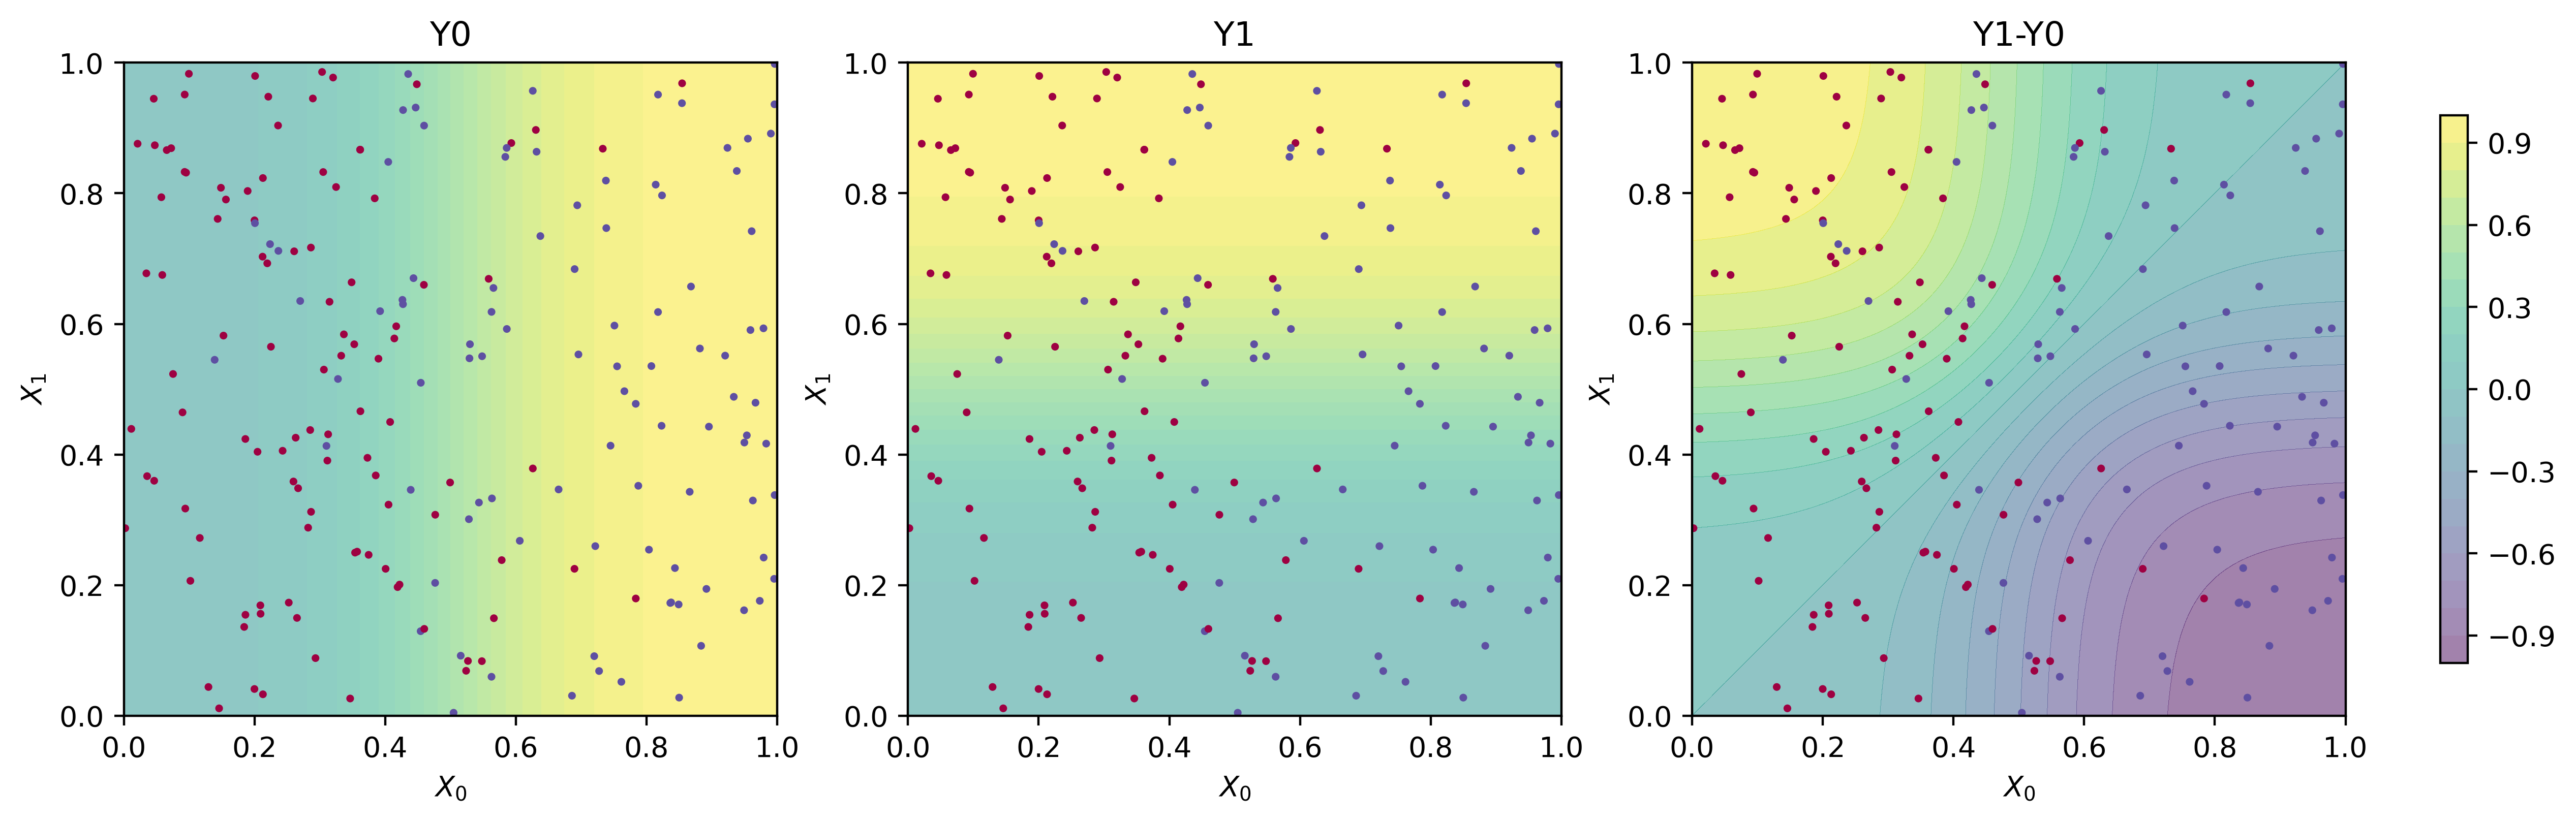

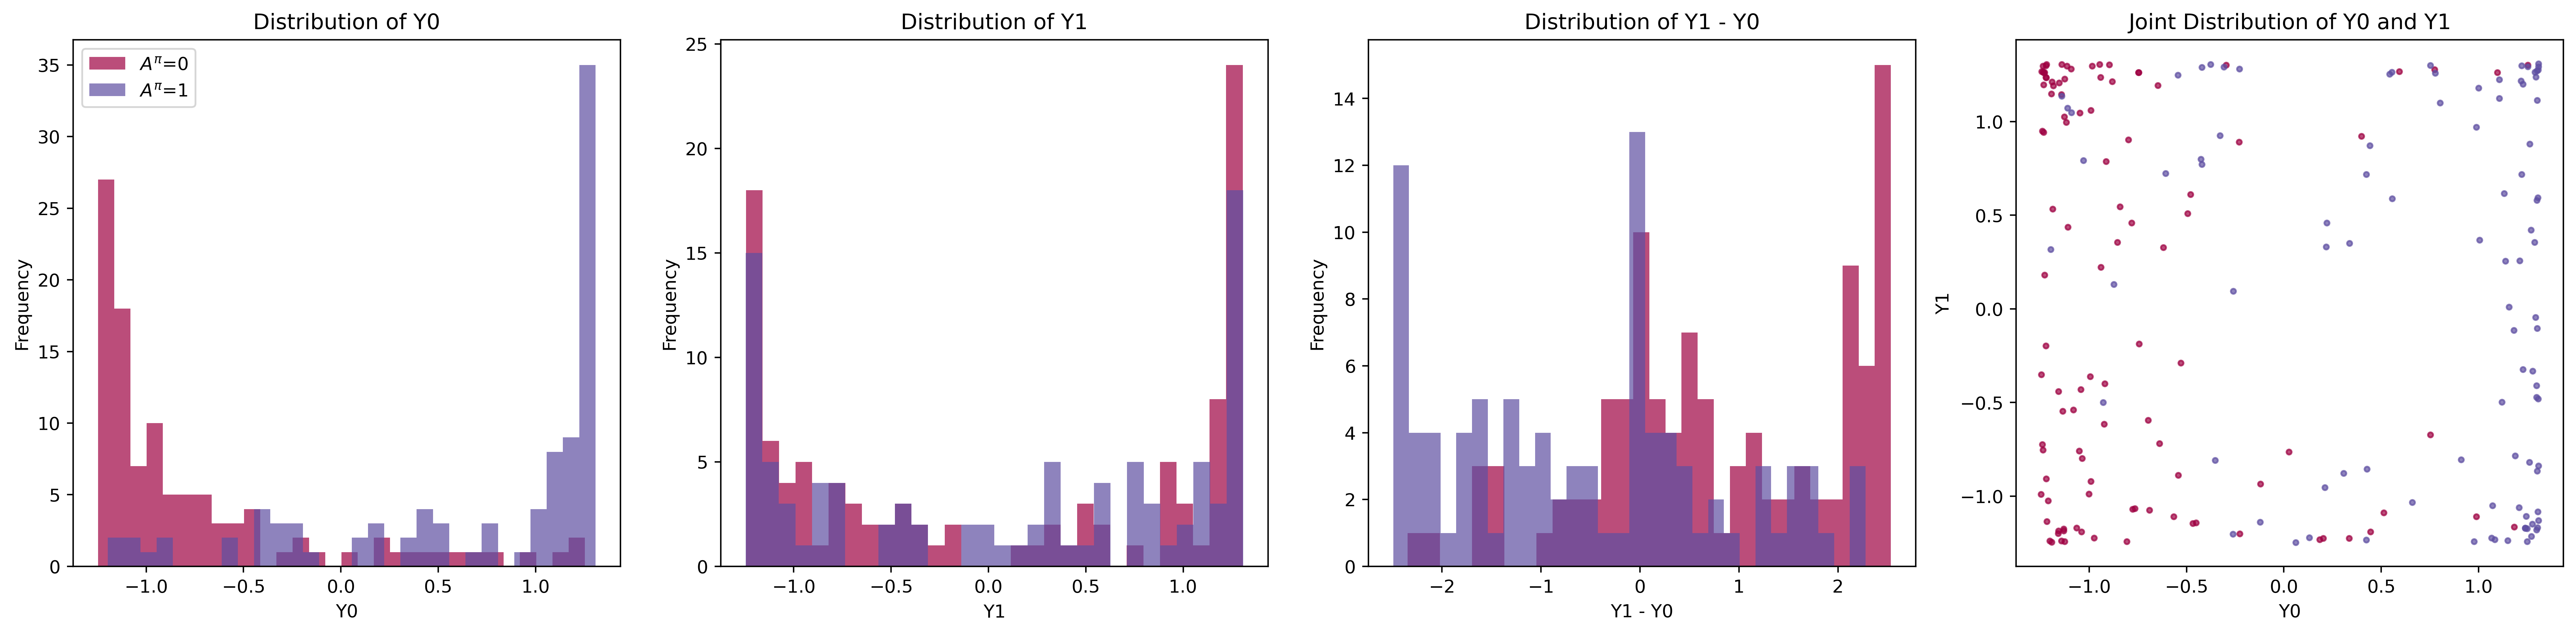

In [150]:
visualize_toy_data("ex6_nonlinear", propensity_scale, num_points_grid, num_points, policy_name='4')

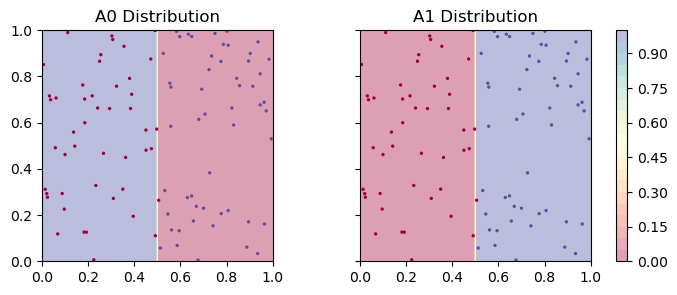

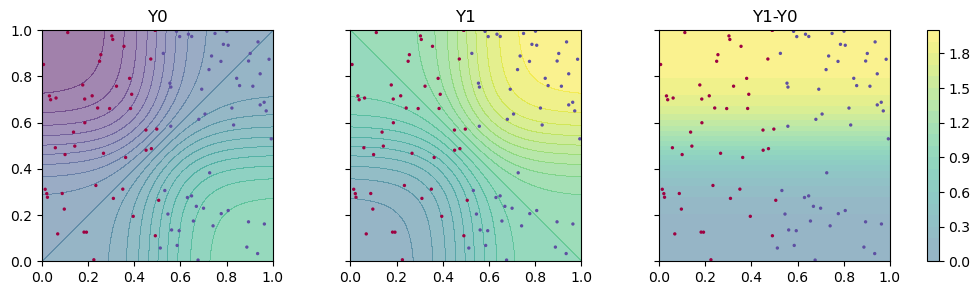

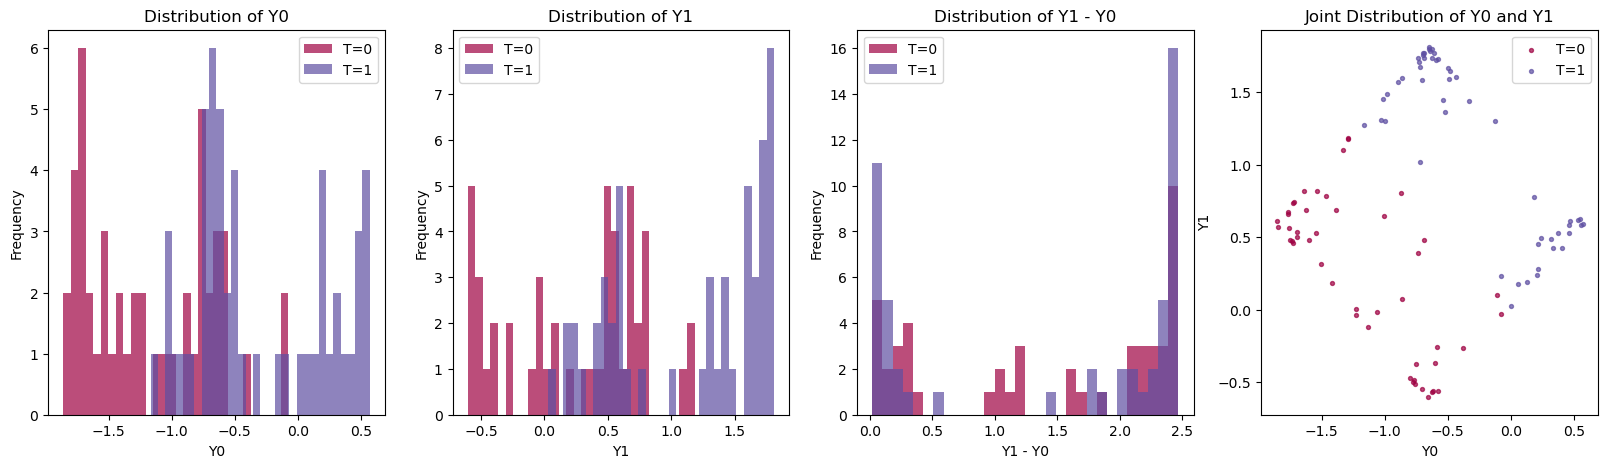

In [20]:
visualize_toy_data("ex7", propensity_scale, num_points_grid, num_points)

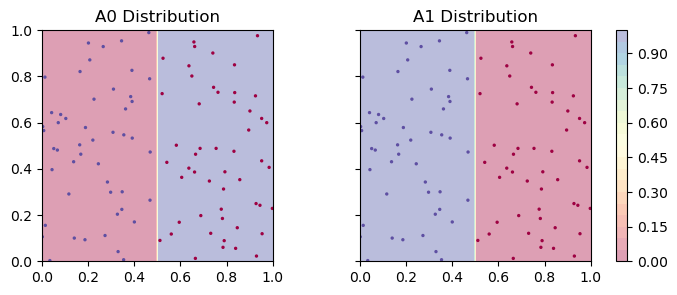

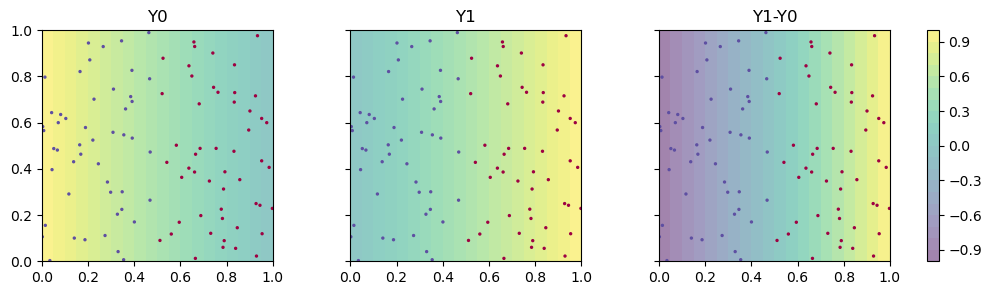

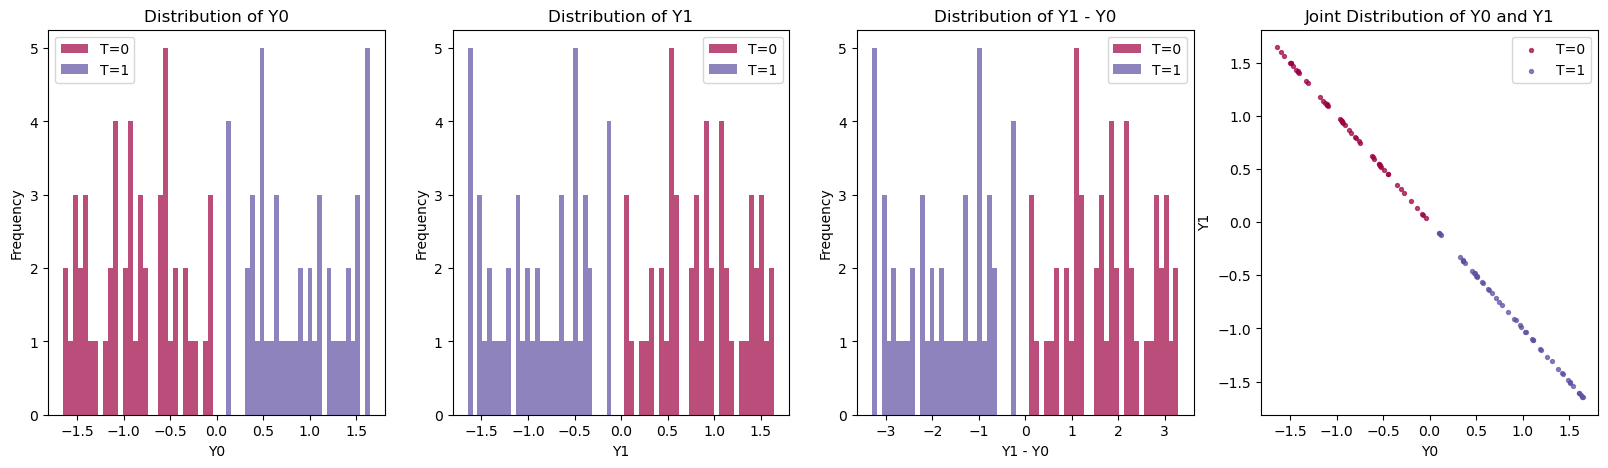

In [21]:
visualize_toy_data("ex8", propensity_scale, num_points_grid, num_points)

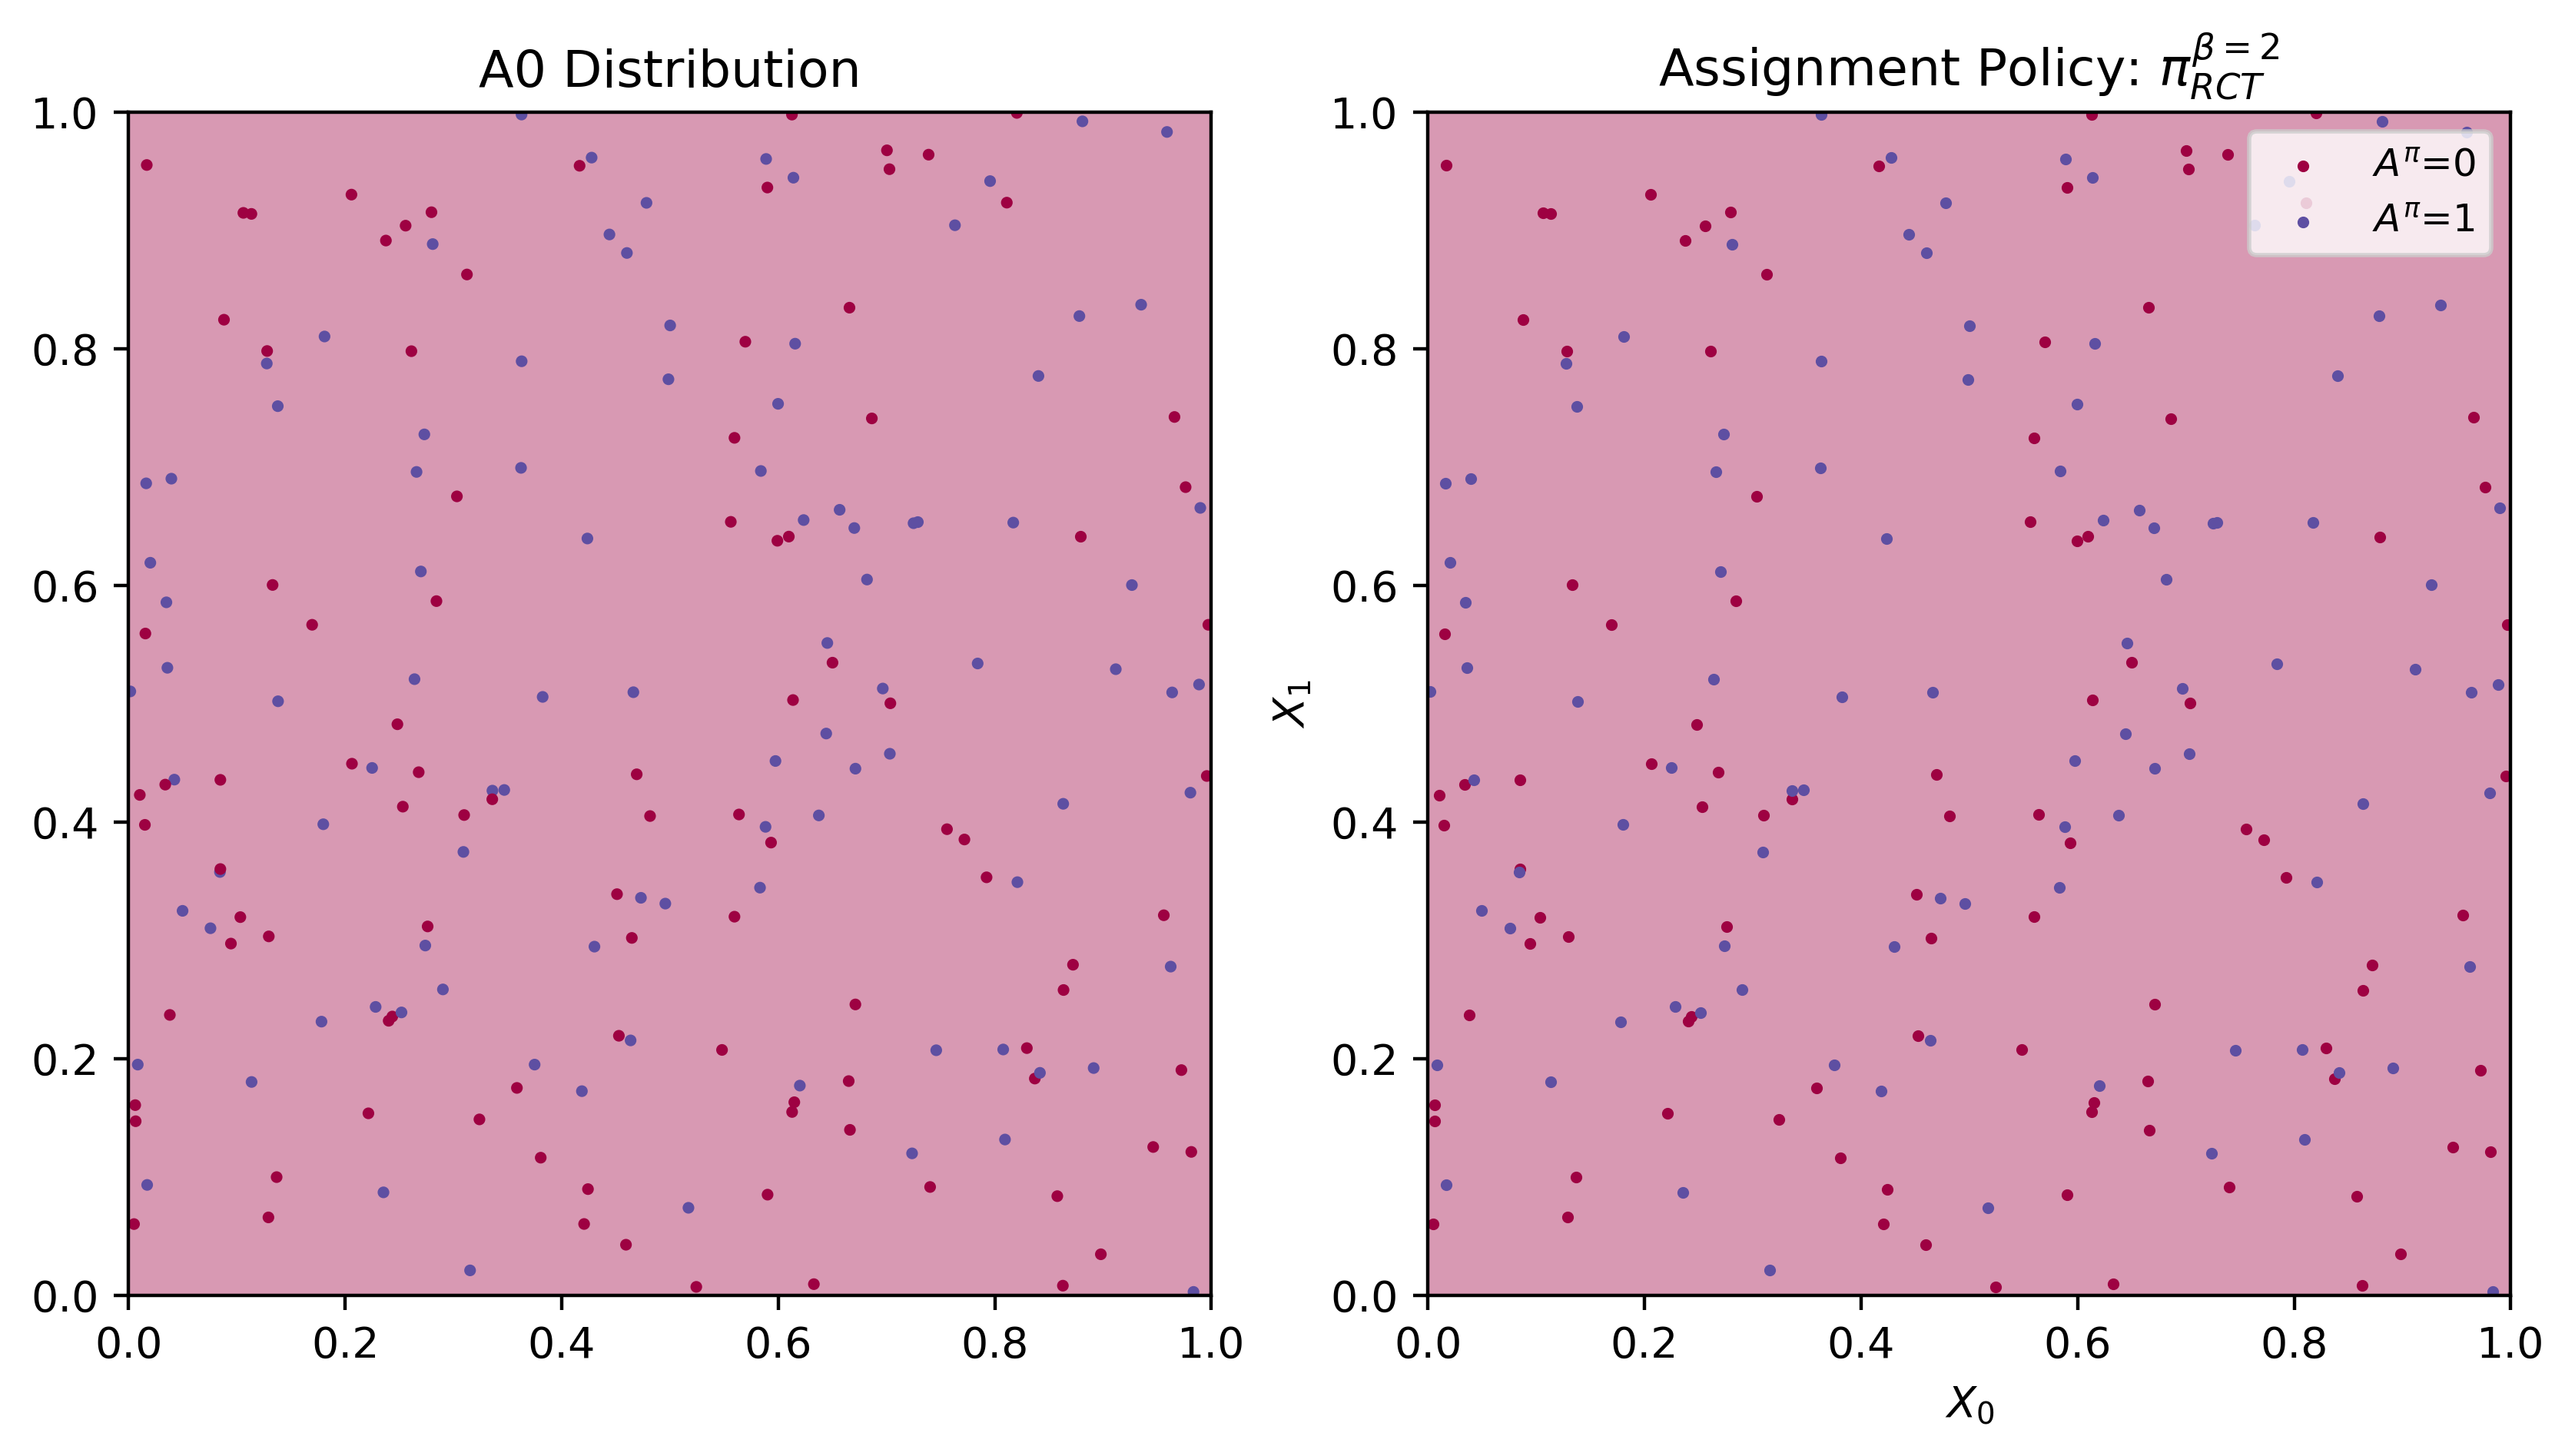

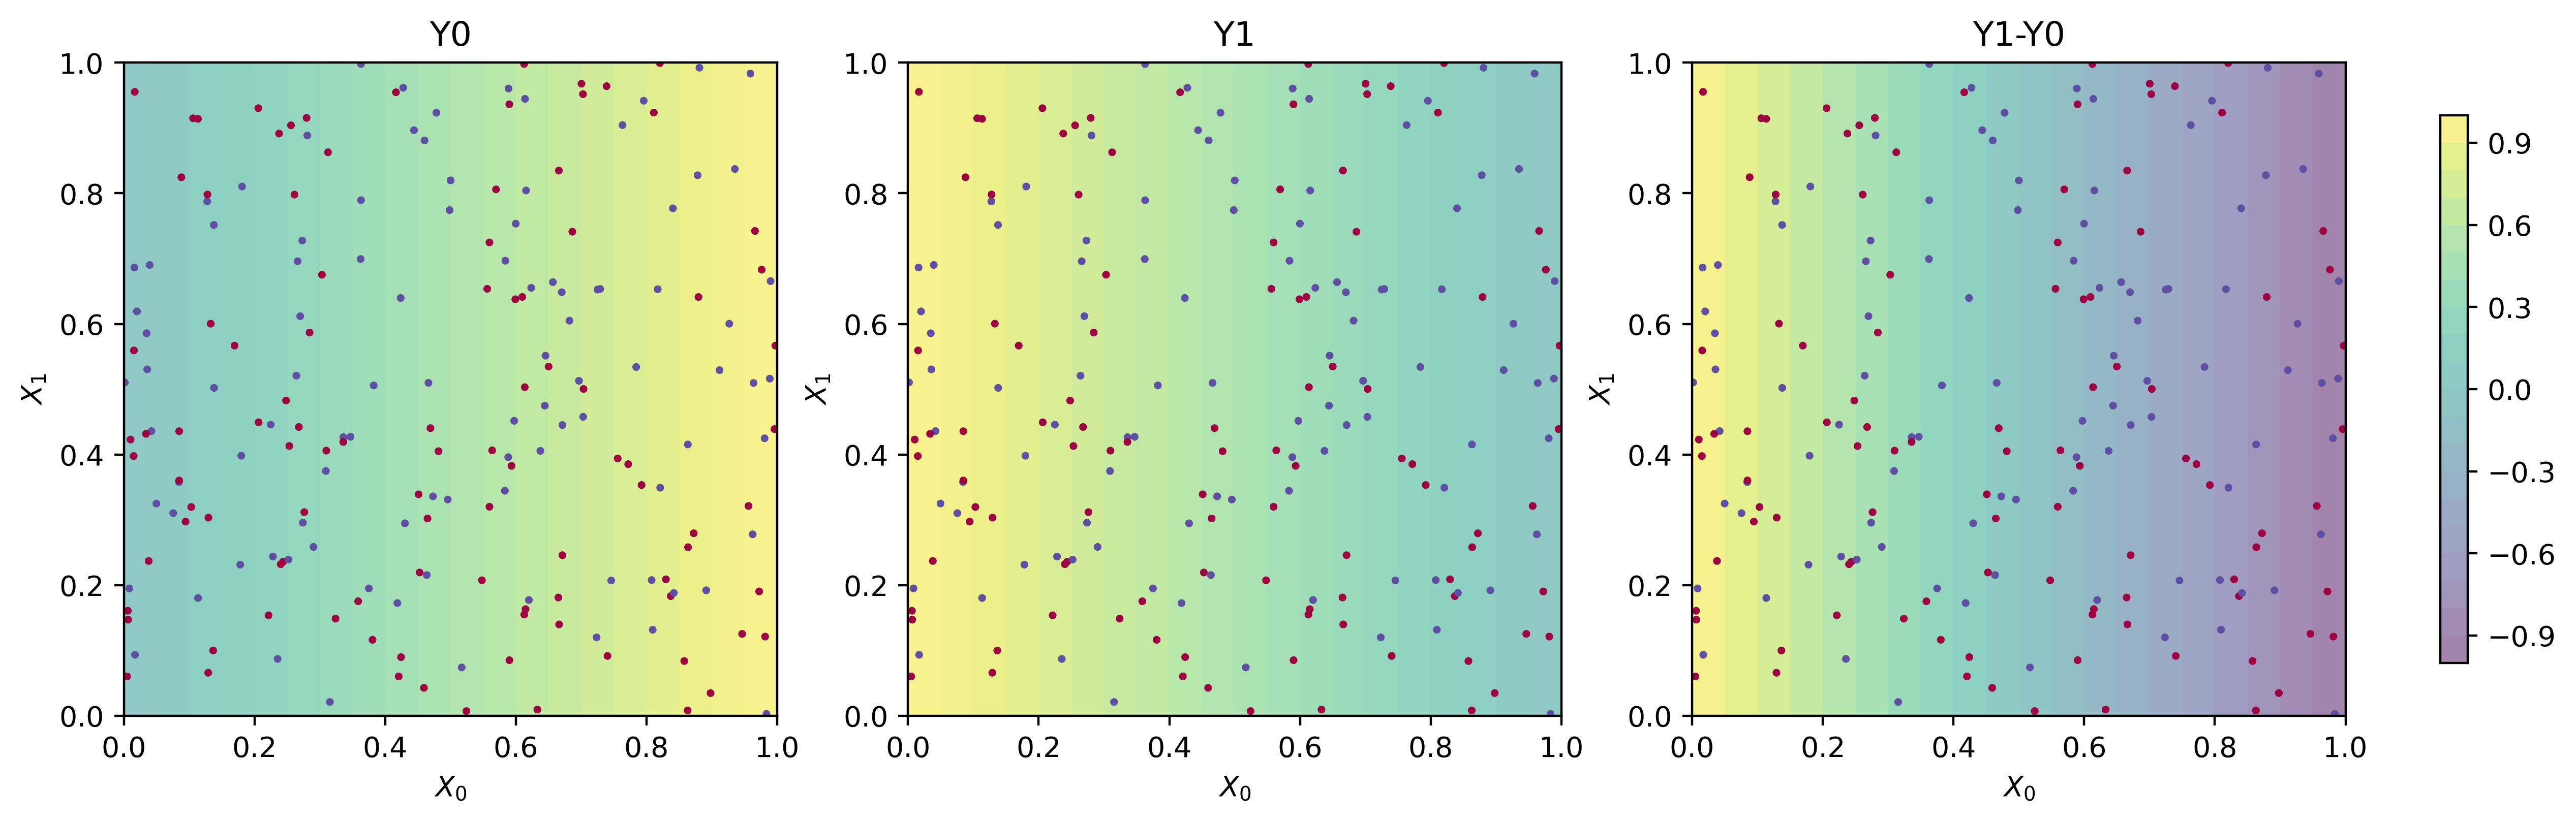

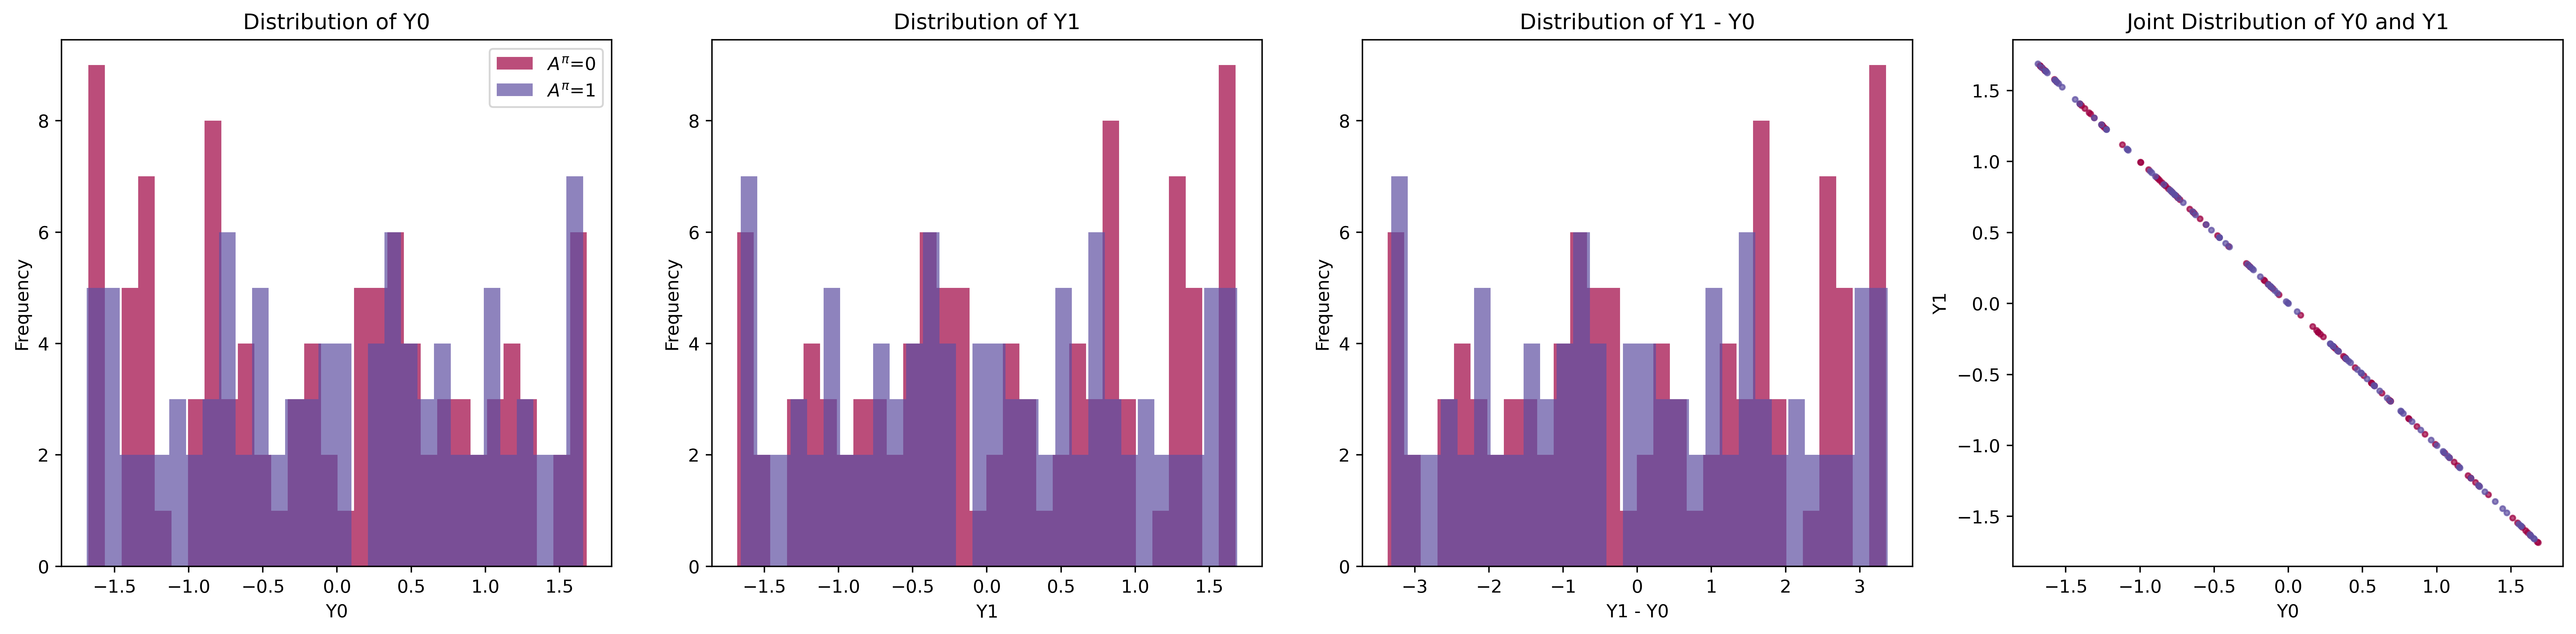

In [156]:
visualize_toy_data("rct", propensity_scale, num_points_grid, num_points, policy_name='RCT')